## Deseq2: Volcano- and Boxplot

In [1]:
library("ggplot2")
library("ggpubr")
library("stringr")
library("gplots")
library("viridis")
#library("VennDiagram")
library("preprocessCore")
library(tidyverse)

library(DESeq2)

#citation("DESeq2")
library(calibrate)
library(eulerr)
library(cluster)
library(ComplexHeatmap)
library(data.table)
library(nortest)
library(RColorBrewer)
library(cowplot)

#install.packages("ggrepel")
library(ggrepel)
library(scales)

Loading required package: magrittr


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parL

In [5]:
#citation('ggplot2')

In [2]:
rm(list=ls())
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(stringsAsFactors = FALSE)


In [3]:
# final colors
# will show sh1, sh3, sh6, sh7, sh11, wt, eq, drosha
col_shgfp <- "gray30"
col_sh1 <- '#9E0142'
col_sh3 <- '#E55649'
col_sh6 <- '#FDAE61'
col_sh7 <- '#FEE08B'
col_sh11 <- '#3288BD'
col_drosha <- "#66C2A5"
col_wt <- '#60258a'
col_eq <- '#4957A4'

ownCol <- c(col_shgfp, col_sh1, col_sh3, col_sh6, col_sh7, col_sh11, col_drosha, col_wt, col_eq)

# read files

### read files: all final files, subsampling at 30 million reads; consider only "dox" samples

In [6]:
hela_shControl_r1 <-  read.csv("mirdeep2_files/hela_shgfp_merge_30mio_r1_cut/miRNAs_expressed_all_samples_hela_shgfp_merge_30mio_r1_cut.csv", header=TRUE, sep="\t")
hela_shControl_r2 <-  read.csv("mirdeep2_files/hela_shgfp_merge_30mio_r2_cut/miRNAs_expressed_all_samples_hela_shgfp_merge_30mio_r2_cut.csv", header=TRUE, sep="\t")

hela_noDox_r1 <- read.csv("mirdeep2_files/hela_shgfp_ctrl_r1_30mio_cut/miRNAs_expressed_all_samples_hela_shgfp_ctrl_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_noDox_r2 <- read.csv("mirdeep2_files/hela_shgfp_ctrl_r2_30mio_cut/miRNAs_expressed_all_samples_hela_shgfp_ctrl_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_shINTS1_r1 <- read.csv("mirdeep2_files/hela_shints1_dox_r1_30mio_cut/miRNAs_expressed_all_samples_hela_shints1_dox_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_shINTS1_r2 <- read.csv("mirdeep2_files/hela_shints1_dox_r2_30mio_cut/miRNAs_expressed_all_samples_hela_shints1_dox_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_shINTS3_r1 <- read.csv("mirdeep2_files/hela_shints3_r1_30mio_cut/miRNAs_expressed_all_samples_hela_shints3_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_shINTS3_r2 <- read.csv("mirdeep2_files/hela_shints3_r2_30mio_cut/miRNAs_expressed_all_samples_hela_shints3_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_shINTS6_r1 <- read.csv("mirdeep2_files/hela_shints6_r1_30mio_cut/miRNAs_expressed_all_samples_hela_shints6_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_shINTS6_r2 <- read.csv("mirdeep2_files/hela_shints6_r2_30mio_cut/miRNAs_expressed_all_samples_hela_shints6_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_shINTS7_r1 <- read.csv("mirdeep2_files/hela_shints7_r1_30mio_cut/miRNAs_expressed_all_samples_hela_shints7_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_shINTS7_r2 <- read.csv("mirdeep2_files/hela_shints7_r2_30mio_cut/miRNAs_expressed_all_samples_hela_shints7_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_shINTS11_r1 <-  read.csv("mirdeep2_files/hela_shints11_merge_30mio_r1_cut/miRNAs_expressed_all_samples_hela_shints11_merge_30mio_r1_cut.csv", header=TRUE, sep="\t")
hela_shINTS11_r2 <-  read.csv("mirdeep2_files/hela_shints11_merge_30mio_r2_cut/miRNAs_expressed_all_samples_hela_shints11_merge_30mio_r2_cut.csv", header=TRUE, sep="\t")

hela_WT_r1 <- read.csv("mirdeep2_files/hela_wt_dox_r1_30mio_cut/miRNAs_expressed_all_samples_hela_wt_dox_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_WT_r2 <- read.csv("mirdeep2_files/hela_wt_dox_r2_30mio_cut/miRNAs_expressed_all_samples_hela_wt_dox_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_E203Q_r1 <- read.csv("mirdeep2_files/hela_eq_dox_r1_30mio_cut/miRNAs_expressed_all_samples_hela_eq_dox_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_E203Q_r2 <- read.csv("mirdeep2_files/hela_eq_dox_r2_30mio_cut/miRNAs_expressed_all_samples_hela_eq_dox_r2_30mio_cut.csv", header=TRUE, sep="\t")

##### siDrosha

In [78]:
hela_siControl_r1 <- read.csv("mirdeep2_files/hela_siC_total_smrna_r1_30mio_cut/miRNAs_expressed_all_samples_hela_siC_total_smrna_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_siControl_r2 <- read.csv("mirdeep2_files/hela_siC_total_smrna_r2_30mio_cut/miRNAs_expressed_all_samples_hela_siC_total_smrna_r2_30mio_cut.csv", header=TRUE, sep="\t")

hela_siDrosha_r1 <- read.csv("mirdeep2_files/hela_siDrosha_total_smrna_r1_30mio_cut/miRNAs_expressed_all_samples_hela_siDrosha_total_smrna_r1_30mio_cut.csv", header=TRUE, sep="\t")
hela_siDrosha_r2 <- read.csv("/mirdeep2_files/hela_siDrosha_total_smrna_r2_30mio_cut/miRNAs_expressed_all_samples_hela_siDrosha_total_smrna_r2_30mio_cut.csv", header=TRUE, sep="\t")

In [79]:
myfiles <- ls(pattern="_r[1,2]")
myfiles

[1] "hela_E203Q_r1"     "hela_E203Q_r2"     "hela_noDox_r1"    
 [4] "hela_noDox_r2"     "hela_shControl_r1" "hela_shControl_r2"
 [7] "hela_shINTS1_r1"   "hela_shINTS1_r2"   "hela_shINTS11_r1" 
[10] "hela_shINTS11_r2"  "hela_shINTS3_r1"   "hela_shINTS3_r2"  
[13] "hela_shINTS6_r1"   "hela_shINTS6_r2"   "hela_shINTS7_r1"  
[16] "hela_shINTS7_r2"   "hela_siControl_r1" "hela_siControl_r2"
[19] "hela_siDrosha_r1"  "hela_siDrosha_r2"  "hela_WT_r1"       
[22] "hela_WT_r2"

# 1) read all data

### Create data frame with all samples

In [80]:
head(hela_noDox_r1)

,X.miRNA,read_count,precursor,total,seq,seq.norm.
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,hsa-let-7a-5p,48286,hsa-let-7a-1,48286,48286,74732.02
2,hsa-let-7a-3p,576,hsa-let-7a-1,576,576,891.47
3,hsa-let-7a-5p,47876,hsa-let-7a-2,47876,47876,74097.46
4,hsa-let-7a-2-3p,7,hsa-let-7a-2,7,7,10.83
5,hsa-let-7a-5p,48485,hsa-let-7a-3,48485,48485,75040.01
6,hsa-let-7a-3p,574,hsa-let-7a-3,574,574,888.38


In [81]:
# all samples in one data frame

# read the data
d <- as.data.frame(hela_E203Q_r1[,1])
colnames(d) <- "miRNA"
for (i in 1:length(myfiles)){
        n <- get(myfiles[i])
        d[,i+1] <- n[,5] # take the "seq" column (raw read numbers - normalized by setting the number of reads to 36mio), not the seq(norm) column (reads per million mapped miRNA reads)
}

colnames(d) <- c("miRNA", myfiles)

# all samples normalized to 30mio reads

# remove duplicated miRNA from different precursors; if sequence the same, then we'll get same read numbers for both
d <- d[!duplicated(d$miRNA),]
#head(d)
nrow(d)

# name rows
rownames(d) <- d$miRNA
d <- d[,-1]
head(d)

[1] 2656

,hela_E203Q_r1,hela_E203Q_r2,hela_noDox_r1,hela_noDox_r2,hela_shControl_r1,hela_shControl_r2,hela_shINTS1_r1,hela_shINTS1_r2,hela_shINTS11_r1,hela_shINTS11_r2,hela_shINTS3_r1,hela_shINTS3_r2,hela_shINTS6_r1,hela_shINTS6_r2,hela_shINTS7_r1,hela_shINTS7_r2,hela_siControl_r1,hela_siControl_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela_WT_r1,hela_WT_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-5p,48394,47037,48286,33029,44805,45390,27458,35804,21343,19833,25329,27358,15907,16383,37341,46130,79707,62320,27574,20558,43386,45957
hsa-let-7a-3p,646,549,576,474,288,324,336,406,261,239,508,501,166,139,412,391,515,451,145,97,542,431
hsa-let-7a-2-3p,4,7,7,8,15,8,5,2,2,1,4,2,1,4,4,8,11,5,0,0,4,2
hsa-let-7b-5p,14059,14192,20257,14645,15982,15461,9999,12831,7612,7415,8943,8942,7992,8090,10285,11486,33579,24681,10299,7340,15971,16961
hsa-let-7b-3p,314,340,282,184,134,127,181,168,169,186,203,169,91,80,106,98,340,312,91,62,253,241
hsa-let-7c-5p,4369,4082,5316,3779,5671,5728,1808,2332,1782,1672,1438,1389,1473,1483,5038,5700,5237,3909,1403,1198,4009,4191


In [82]:
d <- round(d[,], digits = 0)

In [83]:
# only take final list of 205 miRNAs into account
# txt file provided on github
l <- read.delim("/media/labdisk/data/users/nina/Shiekhattarlab_github/205_miRNAs.txt", header=F)[,1]
l

[1] "hsa-let-7a-5p"     "hsa-let-7a-3p"     "hsa-let-7b-5p"    
  [4] "hsa-let-7b-3p"     "hsa-let-7c-5p"     "hsa-let-7d-5p"    
  [7] "hsa-let-7d-3p"     "hsa-let-7e-5p"     "hsa-let-7f-5p"    
 [10] "hsa-let-7f-1-3p"   "hsa-let-7g-5p"     "hsa-let-7i-5p"    
 [13] "hsa-let-7i-3p"     "hsa-miR-100-5p"    "hsa-miR-101-3p"   
 [16] "hsa-miR-103a-3p"   "hsa-miR-106a-5p"   "hsa-miR-106b-5p"  
 [19] "hsa-miR-106b-3p"   "hsa-miR-107"       "hsa-miR-10a-5p"   
 [22] "hsa-miR-1226-3p"   "hsa-miR-125a-5p"   "hsa-miR-125a-3p"  
 [25] "hsa-miR-125b-5p"   "hsa-miR-126-5p"    "hsa-miR-126-3p"   
 [28] "hsa-miR-1275"      "hsa-miR-128-3p"    "hsa-miR-1304-3p"  
 [31] "hsa-miR-1306-5p"   "hsa-miR-1307-3p"   "hsa-miR-130a-3p"  
 [34] "hsa-miR-130b-5p"   "hsa-miR-130b-3p"   "hsa-miR-140-5p"   
 [37] "hsa-miR-140-3p"    "hsa-miR-146b-5p"   "hsa-miR-148b-3p"  
 [40] "hsa-miR-149-5p"    "hsa-miR-151a-5p"   "hsa-miR-151a-3p"  
 [43] "hsa-miR-151b"      "hsa-miR-15b-5p"    "hsa-miR-15b-3p"   
 [46] "hsa-miR-16-5p"     "hsa-miR-16-2-3p"   "hsa-miR-17-5p"    
 [49] "hsa-miR-17-3p"     "hsa-miR-181a-5p"   "hsa-miR-181b-5p"  
 [52] "hsa-miR-182-5p"    "hsa-miR-183-5p"    "hsa-miR-185-5p"   
 [55] "hsa-miR-186-5p"    "hsa-miR-188-5p"    "hsa-miR-18a-5p"   
 [58] "hsa-miR-18a-3p"    "hsa-miR-1908-5p"   "hsa-miR-190a-5p"  
 [61] "hsa-miR-191-5p"    "hsa-miR-192-5p"    "hsa-miR-193a-5p"  
 [64] "hsa-miR-193b-5p"   "hsa-miR-193b-3p"   "hsa-miR-194-5p"   
 [67] "hsa-miR-196a-5p"   "hsa-miR-196b-5p"   "hsa-miR-199a-5p"  
 [70] "hsa-miR-199a-3p"   "hsa-miR-199b-3p"   "hsa-miR-19a-3p"   
 [73] "hsa-miR-19b-3p"    "hsa-miR-203a-3p"   "hsa-miR-20a-5p"   
 [76] "hsa-miR-20a-3p"    "hsa-miR-21-5p"     "hsa-miR-21-3p"    
 [79] "hsa-miR-210-3p"    "hsa-miR-22-5p"     "hsa-miR-22-3p"    
 [82] "hsa-miR-221-3p"    "hsa-miR-222-3p"    "hsa-miR-224-5p"   
 [85] "hsa-miR-23a-5p"    "hsa-miR-23a-3p"    "hsa-miR-23b-3p"   
 [88] "hsa-miR-24-3p"     "hsa-miR-24-2-5p"   "hsa-miR-25-5p"    
 [91] "hsa-miR-25-3p"     "hsa-miR-26a-5p"    "hsa-miR-26b-5p"   
 [94] "hsa-miR-27a-5p"    "hsa-miR-27a-3p"    "hsa-miR-27b-5p"   
 [97] "hsa-miR-27b-3p"    "hsa-miR-28-5p"     "hsa-miR-28-3p"    
[100] "hsa-miR-296-5p"    "hsa-miR-296-3p"    "hsa-miR-29a-3p"   
[103] "hsa-miR-29b-1-5p"  "hsa-miR-29b-3p"    "hsa-miR-29c-5p"   
[106] "hsa-miR-29c-3p"    "hsa-miR-301a-3p"   "hsa-miR-30a-3p"   
[109] "hsa-miR-30b-5p"    "hsa-miR-30b-3p"    "hsa-miR-30c-5p"   
[112] "hsa-miR-30c-2-3p"  "hsa-miR-30d-3p"    "hsa-miR-30e-3p"   
[115] "hsa-miR-31-5p"     "hsa-miR-31-3p"     "hsa-miR-32-3p"    
[118] "hsa-miR-3200-3p"   "hsa-miR-320a-3p"   "hsa-miR-320b"     
[121] "hsa-miR-324-5p"    "hsa-miR-324-3p"    "hsa-miR-326"      
[124] "hsa-miR-328-3p"    "hsa-miR-330-5p"    "hsa-miR-330-3p"   
[127] "hsa-miR-331-3p"    "hsa-miR-335-5p"    "hsa-miR-335-3p"   
[130] "hsa-miR-339-3p"    "hsa-miR-340-3p"    "hsa-miR-342-3p"   
[133] "hsa-miR-345-5p"    "hsa-miR-34a-5p"    "hsa-miR-361-5p"   
[136] "hsa-miR-361-3p"    "hsa-miR-365a-3p"   "hsa-miR-365b-3p"  
[139] "hsa-miR-374a-5p"   "hsa-miR-374a-3p"   "hsa-miR-374b-5p"  
[142] "hsa-miR-378a-5p"   "hsa-miR-378a-3p"   "hsa-miR-378c"     
[145] "hsa-miR-378g"      "hsa-miR-421"       "hsa-miR-423-5p"   
[148] "hsa-miR-423-3p"    "hsa-miR-424-5p"    "hsa-miR-424-3p"   
[151] "hsa-miR-425-5p"    "hsa-miR-425-3p"    "hsa-miR-452-5p"   
[154] "hsa-miR-4521"      "hsa-miR-454-3p"    "hsa-miR-455-3p"   
[157] "hsa-miR-484"       "hsa-miR-500a-3p"   "hsa-miR-502-3p"   
[160] "hsa-miR-504-5p"    "hsa-miR-504-3p"    "hsa-miR-505-5p"   
[163] "hsa-miR-505-3p"    "hsa-miR-532-5p"    "hsa-miR-532-3p"   
[166] "hsa-miR-548aa"     "hsa-miR-550a-5p"   "hsa-miR-550a-3-5p"
[169] "hsa-miR-556-3p"    "hsa-miR-574-5p"    "hsa-miR-574-3p"   
[172] "hsa-miR-576-5p"    "hsa-miR-582-5p"    "hsa-miR-590-3p"   
[175] "hsa-miR-615-3p"    "hsa-miR-625-5p"    "hsa-miR-625-3p"   
[178] "hsa-miR-629-5p"    "hsa-miR-629-3p"    "hsa-miR-642a-5p"  
[181] "hsa-miR-652-5p"    "hsa-miR-660-5p"

In [84]:
# create dataframe with 205 miRNAs of interest
dsub <- d[grep(paste(l, collapse="|"), rownames(d)),]
nrow(dsub)
head(dsub)


[1] 205

,hela_E203Q_r1,hela_E203Q_r2,hela_noDox_r1,hela_noDox_r2,hela_shControl_r1,hela_shControl_r2,hela_shINTS1_r1,hela_shINTS1_r2,hela_shINTS11_r1,hela_shINTS11_r2,hela_shINTS3_r1,hela_shINTS3_r2,hela_shINTS6_r1,hela_shINTS6_r2,hela_shINTS7_r1,hela_shINTS7_r2,hela_siControl_r1,hela_siControl_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela_WT_r1,hela_WT_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hsa-let-7a-5p,48394,47037,48286,33029,44805,45390,27458,35804,21343,19833,25329,27358,15907,16383,37341,46130,79707,62320,27574,20558,43386,45957
hsa-let-7a-3p,646,549,576,474,288,324,336,406,261,239,508,501,166,139,412,391,515,451,145,97,542,431
hsa-let-7b-5p,14059,14192,20257,14645,15982,15461,9999,12831,7612,7415,8943,8942,7992,8090,10285,11486,33579,24681,10299,7340,15971,16961
hsa-let-7b-3p,314,340,282,184,134,127,181,168,169,186,203,169,91,80,106,98,340,312,91,62,253,241
hsa-let-7c-5p,4369,4082,5316,3779,5671,5728,1808,2332,1782,1672,1438,1389,1473,1483,5038,5700,5237,3909,1403,1198,4009,4191
hsa-let-7d-5p,8231,8008,9805,6937,9008,8847,4738,5892,3639,3489,4810,5279,2418,2372,9270,12385,7756,6681,1579,1314,9094,9151


# Z-score heatmap of miRNA levels 

In [85]:
set.seed(100)

In [86]:
# Colorings

selcol2 <- colorRampPalette(brewer.pal(9,"RdGy"))
#clustcol.height = selcol2(clust.height);

## Heatmap sh6 vs sh11

In [87]:
# note: 
# heatmap.2 clusters BEFORE calculating the z-score (scale="row"), so the clustering looks off
# I worked around this by retrieving the normalized z-scores, cluster according them and plotting as heatmap with according clustering in a second step

In [88]:
levels <- dsub[,grep("shControl|shINTS6|shINTS11", colnames(dsub))]
colnames(levels) <- gsub("hela_","", colnames(levels))
rownames(levels) <- gsub("hsa-","", rownames(levels))

# sort for shControl_r1
levels <- levels[order(levels$shControl_r1, decreasing=TRUE),]
head(levels)



,shControl_r1,shControl_r2,shINTS11_r1,shINTS11_r2,shINTS6_r1,shINTS6_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
let-7a-5p,44805,45390,21343,19833,15907,16383
let-7f-5p,34663,35809,18243,16227,12983,12826
miR-23a-3p,27190,28326,9486,9480,10915,11911
miR-24-3p,21613,22329,6663,6777,8160,8402
miR-25-3p,20627,22207,6986,7116,8638,9762
let-7b-5p,15982,15461,7612,7415,7992,8090


In [89]:
colCol <- c(col_shgfp, col_shgfp, col_sh11, col_sh11, col_sh6, col_sh6)


In [90]:
# clustering not final

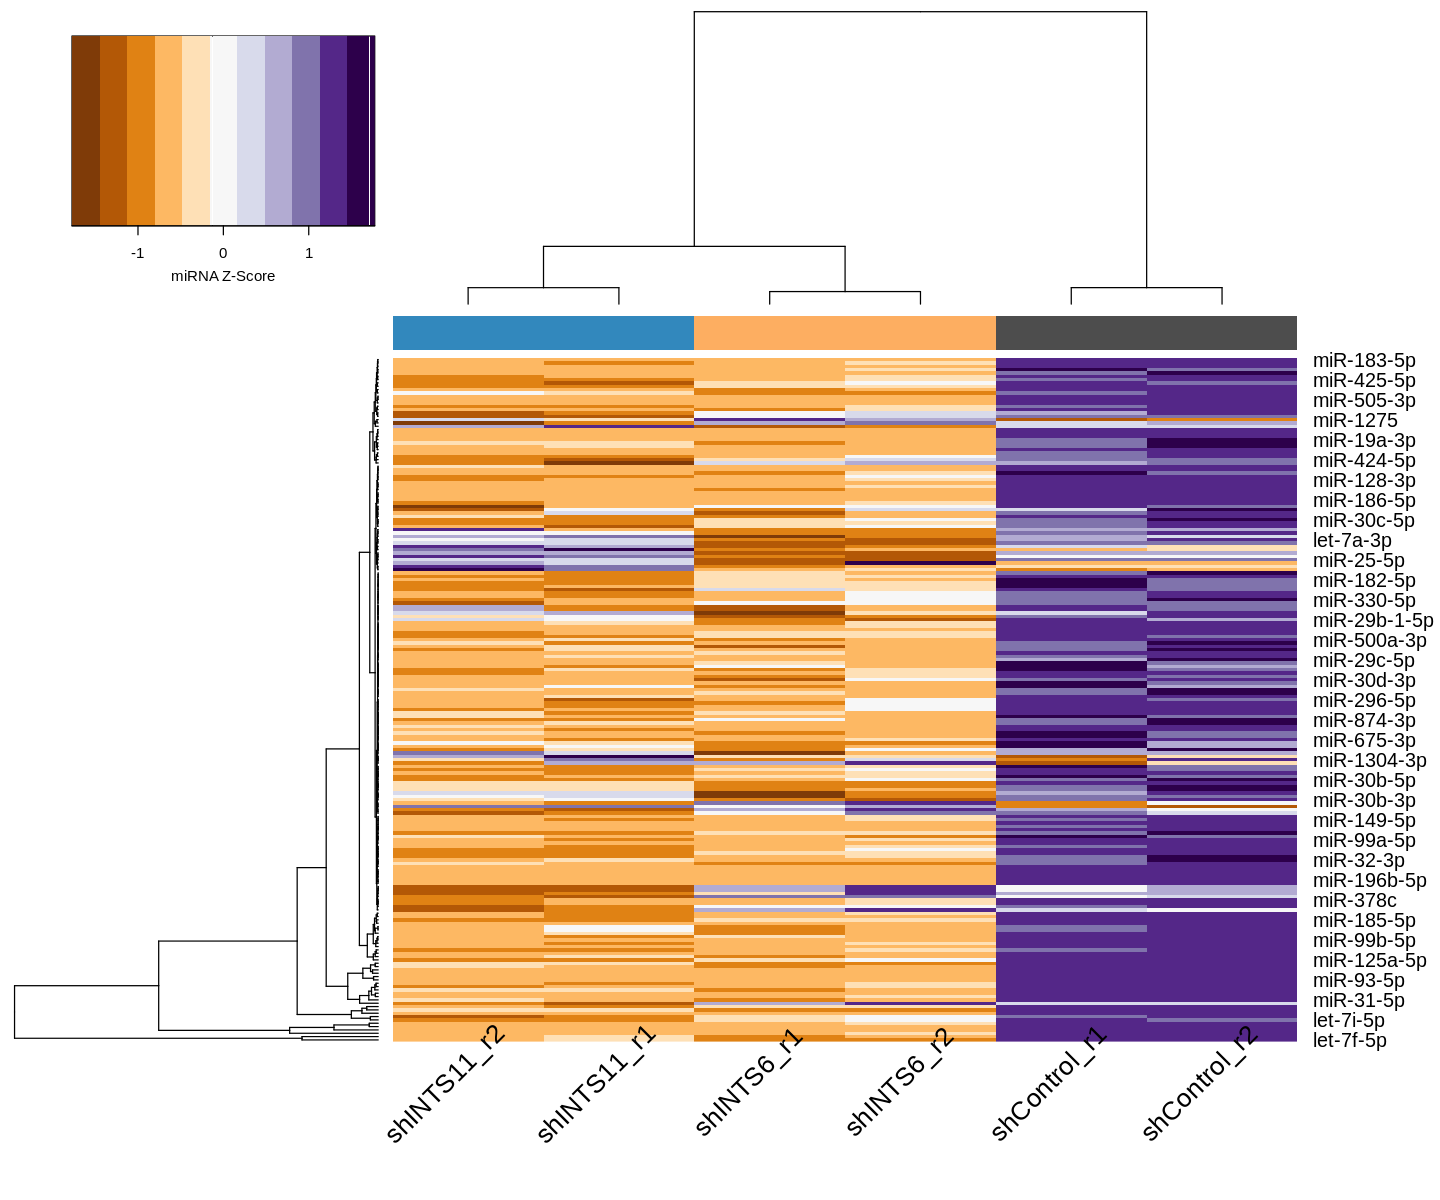

In [91]:
options(repr.plot.width=12, repr.plot.height=10)

# Taken from: https://davetang.org/muse/2010/12/06/making-a-heatmap-with-r/


h <- heatmap.2(as.matrix(levels), dendrogram='both', 
          scale="row", density.info="none", 
          Rowv = TRUE, Colv=TRUE,
          #Rowv=as.dendrogram(cluster.row), Colv=as.dendrogram(cluster.col),
          trace="none", key.xlab="miRNA Z-Score", key.title="", 
          col=brewer.pal(11,"PuOr"), 
          offsetRow=0.5, cexRow=1.5, 
          cexCol = 2, srtCol=45, adjCol =0.7, ColSideColors = colCol,
          margins = c(10, 9),symbreaks=TRUE)

#png("deseq2_figures/heatmap_shC_sh1_3_6_7_11_206miRNA.png", width = 15, height = 20, units= "cm", res=600)
#pdf("deseq2_figures/heatmap_shC_sh1_3_6_7_11_206miRNA.pdf", width = 15, height = 20)



In [92]:
h.fin <- t(as.data.frame(h$carpet))

In [93]:
#https://www.biostars.org/p/152291/

distance.row = dist(as.matrix(h.fin), method = "euclidean")
cluster.row = hclust(distance.row, method = "ward.D")
distance.col = dist(t(as.matrix(h.fin)), method = "euclidean")
cluster.col = hclust(distance.col, method = "ward.D")


'dendrogram' with 2 branches and 205 members total, at height 54.11202 

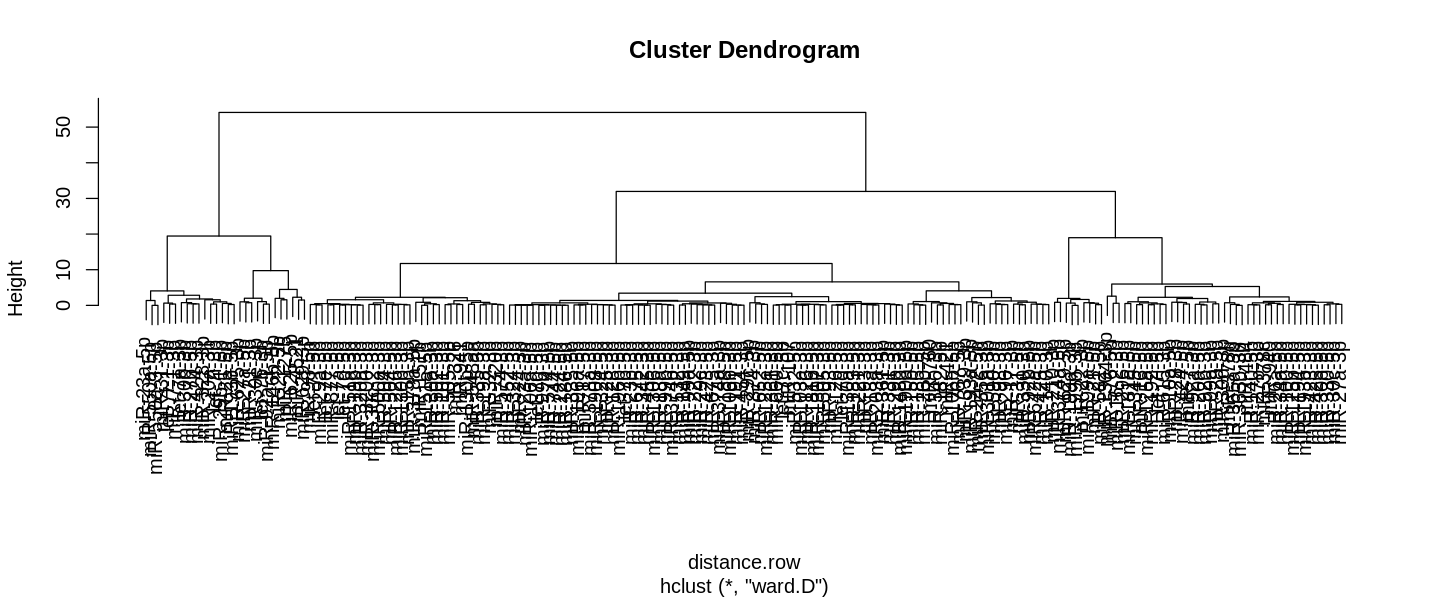

In [94]:
# add cluster colors for rows

as.dendrogram(cluster.row)

options(repr.plot.width=12, repr.plot.height=5)
plot(cluster.row)
clusters <- cutree(cluster.row, k = 4)
clust.height <-  length(unique(as.vector(clusters)))

In [95]:
# Colorings rowclusters
# check colors: https://rdrr.io/cran/RColorBrewer/man/ColorBrewer.html

selcol2 <- colorRampPalette(brewer.pal(5,"Greys"))
clustcol.height = selcol2(clust.height);

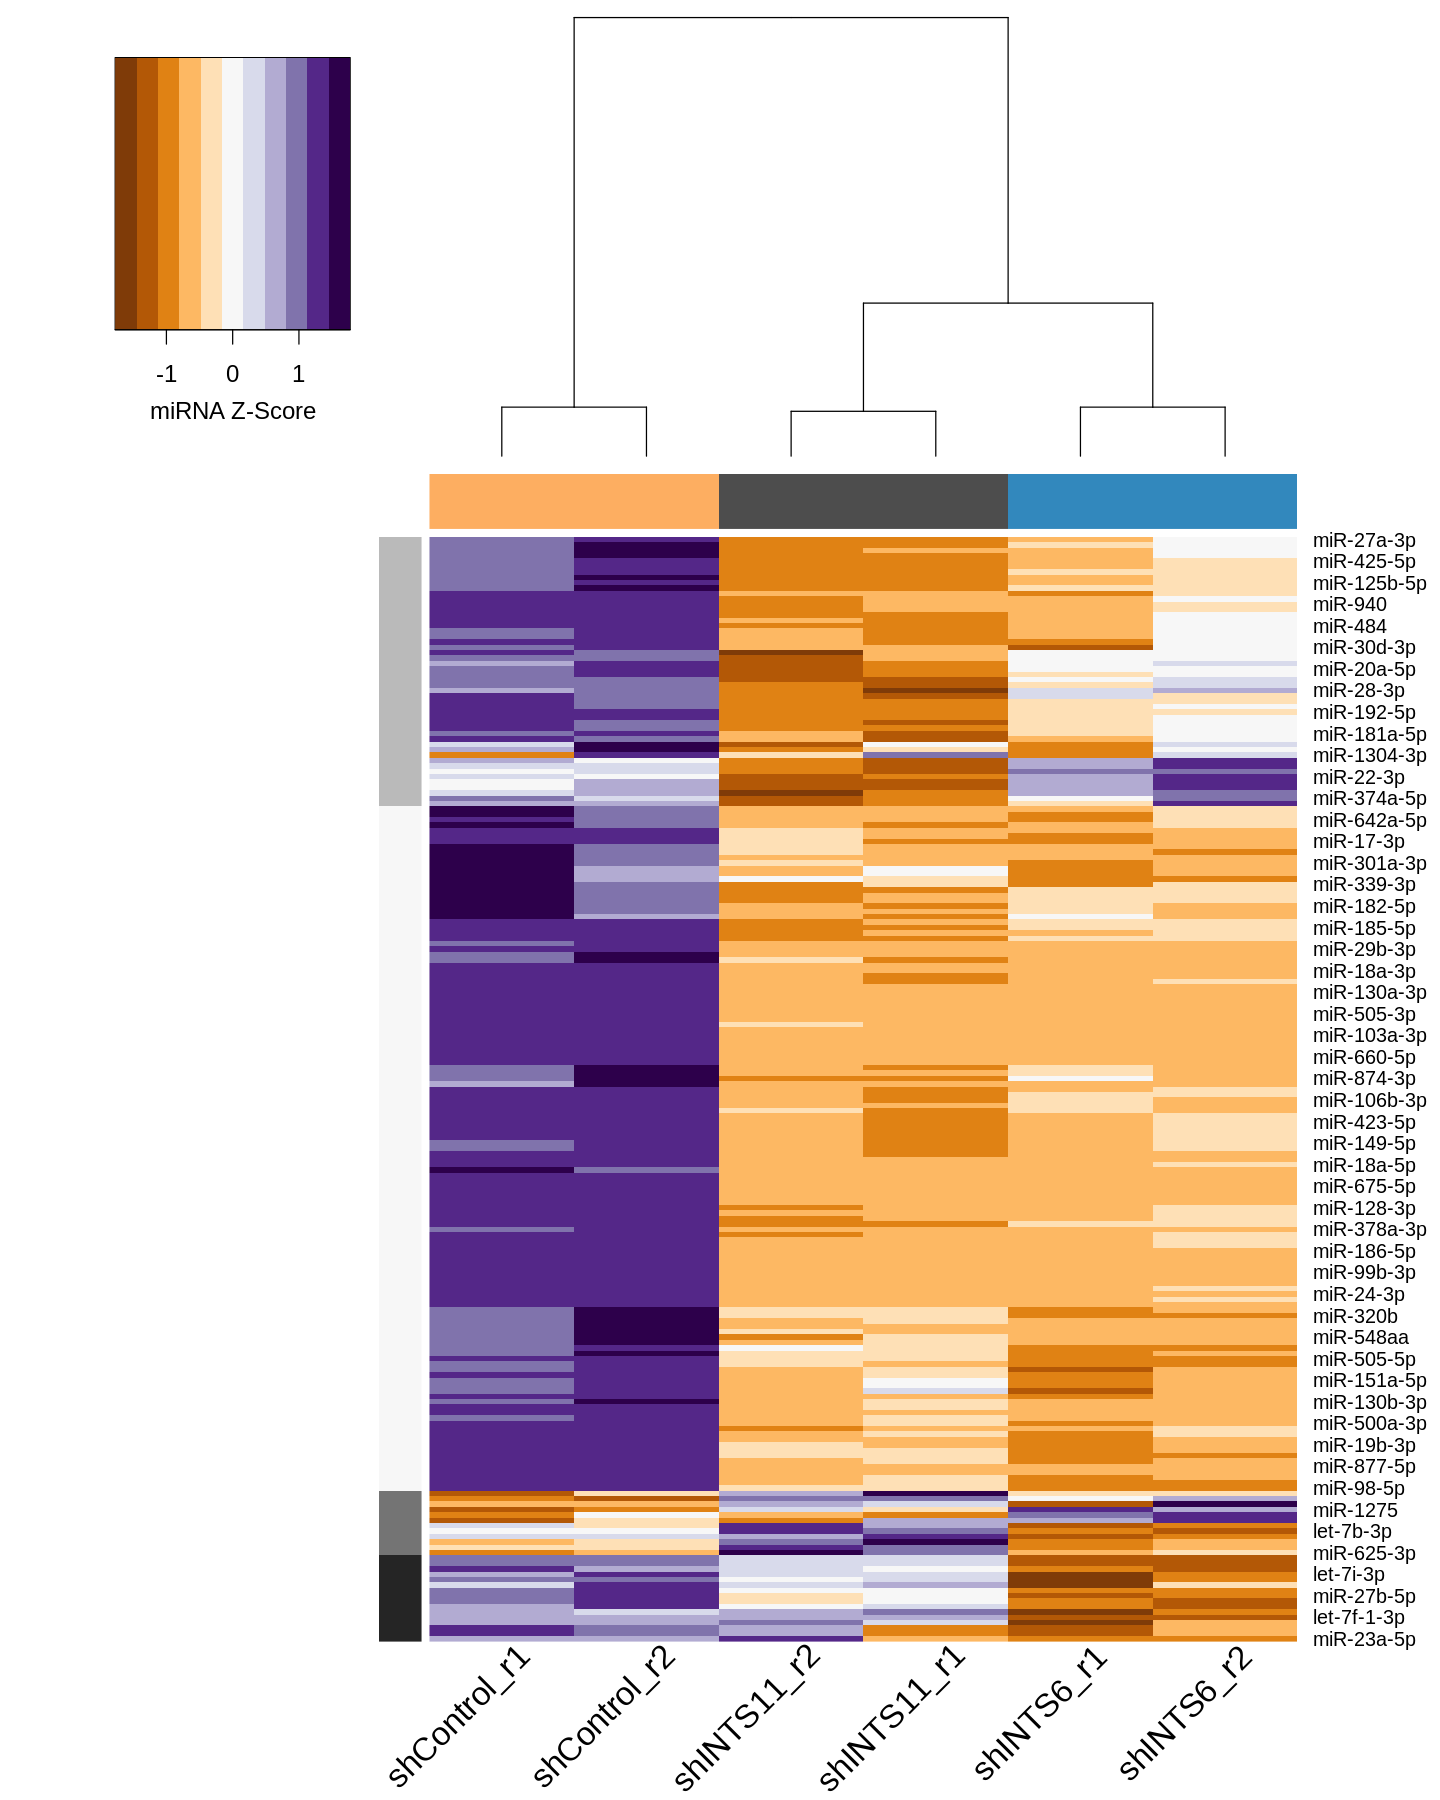

In [96]:
options(repr.plot.width=12, repr.plot.height=15)

# Taken from: https://davetang.org/muse/2010/12/06/making-a-heatmap-with-r/

#pdf("deseq2_figures/heatmap_shC_sh6_11_206miRNA.pdf", width = 12, height = 15)
#png("deseq2_figures/heatmap_shC_sh6_11_206miRNA.png", width = 12, height = 15, units= "cm", res=600)

heatmap.2(as.matrix(h.fin), dendrogram='column', 
          scale="none", density.info="none", 
          RowSideColors = clustcol.height[clusters],
          Rowv=as.dendrogram(cluster.row), Colv=as.dendrogram(cluster.col),
          trace="none", 
          key.xlab="miRNA Z-Score", key.title="", key.par = list(cex=1.2), #keysize=0.7,
          col=brewer.pal(11,"PuOr"), 
          offsetRow=0.5, cexRow=1.5, 
          cexCol = 2.5, srtCol=45, adjCol =0.82, ColSideColors = colCol,
          margins = c(10, 9),symbreaks=TRUE)

#dev.off()



# Deseq2 on raw reads: no normalization of library size because of subsampling

In [97]:
set.seed(100)

In [98]:
counts.table <- as.data.frame(dsub)
rownames(counts.table) <- gsub("hsa-", "", rownames(counts.table))

head(counts.table)
nrow(counts.table)

,hela_E203Q_r1,hela_E203Q_r2,hela_noDox_r1,hela_noDox_r2,hela_shControl_r1,hela_shControl_r2,hela_shINTS1_r1,hela_shINTS1_r2,hela_shINTS11_r1,hela_shINTS11_r2,hela_shINTS3_r1,hela_shINTS3_r2,hela_shINTS6_r1,hela_shINTS6_r2,hela_shINTS7_r1,hela_shINTS7_r2,hela_siControl_r1,hela_siControl_r2,hela_siDrosha_r1,hela_siDrosha_r2,hela_WT_r1,hela_WT_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
let-7a-5p,48394,47037,48286,33029,44805,45390,27458,35804,21343,19833,25329,27358,15907,16383,37341,46130,79707,62320,27574,20558,43386,45957
let-7a-3p,646,549,576,474,288,324,336,406,261,239,508,501,166,139,412,391,515,451,145,97,542,431
let-7b-5p,14059,14192,20257,14645,15982,15461,9999,12831,7612,7415,8943,8942,7992,8090,10285,11486,33579,24681,10299,7340,15971,16961
let-7b-3p,314,340,282,184,134,127,181,168,169,186,203,169,91,80,106,98,340,312,91,62,253,241
let-7c-5p,4369,4082,5316,3779,5671,5728,1808,2332,1782,1672,1438,1389,1473,1483,5038,5700,5237,3909,1403,1198,4009,4191
let-7d-5p,8231,8008,9805,6937,9008,8847,4738,5892,3639,3489,4810,5279,2418,2372,9270,12385,7756,6681,1579,1314,9094,9151


[1] 205

# compare all samples to merged shGFP dox

In [99]:
# create subsets for Deseq2

subs_shControl_noDox <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|noDox", colnames(counts.table)))])
rownames(subs_shControl_noDox) <- seq(1:nrow(subs_shControl_noDox))
head(subs_shControl_noDox, n=3)

subs_shINTS1 <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|shINTS1_", colnames(counts.table)))])
rownames(subs_shINTS1) <- seq(1:nrow(subs_shINTS1))
#head(subs_shINTS1, n=3)

subs_shINTS3 <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|shINTS3", colnames(counts.table)))])
rownames(subs_shINTS3) <- seq(1:nrow(subs_shINTS3))
#head(subs_shINTS3, n=3)

subs_shINTS6 <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|shINTS6", colnames(counts.table)))])
rownames(subs_shINTS6) <- seq(1:nrow(subs_shINTS6))
#head(subs_shINTS6, n=3)

subs_shINTS7 <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|shINTS7", colnames(counts.table)))])
rownames(subs_shINTS7) <- seq(1:nrow(subs_shINTS7))
#head(subs_shINTS7, n=3)

subs_shINTS11 <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|shINTS11", colnames(counts.table)))])
rownames(subs_shINTS11) <- seq(1:nrow(subs_shINTS11))
#head(subs_shINTS11, n=3)

subs_WT <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|WT", colnames(counts.table)))])
rownames(subs_WT) <- seq(1:nrow(subs_WT))
head(subs_WT, n=3)

subs_E203Q <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("shControl|E203Q", colnames(counts.table)))])
rownames(subs_E203Q) <- seq(1:nrow(subs_E203Q))
#head(subs_E203Q, n=3)

subs_siDrosha <- cbind.data.frame(rownames(counts.table), counts.table[,c(grep("si", colnames(counts.table)))])
rownames(subs_siDrosha) <- seq(1:nrow(subs_siDrosha))
head(subs_siDrosha)

,rownames(counts.table),hela_noDox_r1,hela_noDox_r2,hela_shControl_r1,hela_shControl_r2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-5p,48286,33029,44805,45390
2,let-7a-3p,576,474,288,324
3,let-7b-5p,20257,14645,15982,15461


,rownames(counts.table),hela_shControl_r1,hela_shControl_r2,hela_WT_r1,hela_WT_r2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-5p,44805,45390,43386,45957
2,let-7a-3p,288,324,542,431
3,let-7b-5p,15982,15461,15971,16961


,rownames(counts.table),hela_siControl_r1,hela_siControl_r2,hela_siDrosha_r1,hela_siDrosha_r2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-5p,79707,62320,27574,20558
2,let-7a-3p,515,451,145,97
3,let-7b-5p,33579,24681,10299,7340
4,let-7b-3p,340,312,91,62
5,let-7c-5p,5237,3909,1403,1198
6,let-7d-5p,7756,6681,1579,1314


In [100]:
myfiles <- ls(pattern="subs_")
myfiles

[1] "subs_E203Q"           "subs_shControl_noDox" "subs_shINTS1"        
[4] "subs_shINTS11"        "subs_shINTS3"         "subs_shINTS6"        
[7] "subs_shINTS7"         "subs_siDrosha"        "subs_WT"

In [102]:
# create control vs treated table for deseq2

for (z in 1:length(myfiles)){
    g <- get(myfiles[z])
    id <- colnames(g[,2:ncol(g)])
    
    m <- data.frame(matrix(ncol = 2, nrow = ncol(g[,2:ncol(g)])))
    colnames(m) <- c("id", "dex")
    m$id <- id
    
    for(i in 1:nrow(m)){
        if (grepl("shControl|siControl", m$id[i])){
            m$dex[i] <- "control"
        } 
        else if (!(grepl("shControl|siControl", m$id[i]))){
            m$dex[i] <- "treated"
        }
    }
    m <- m[!is.na(m$dex),]
    nam <- paste("metadata_", gsub("subs_", "", myfiles[z]), sep="")
    assign(nam,m)
}




In [103]:
metadata_shControl_noDox$dex <- c("treated", "treated","control", "control")
metadata_shControl_noDox

,id,dex
,<chr>,<chr>
1,hela_noDox_r1,treated
2,hela_noDox_r2,treated
3,hela_shControl_r1,control
4,hela_shControl_r2,control


# create volcanos for all

In [105]:
#dir.create("deseq2_figures")

target.dir <- "deseq2_figures"



In [106]:
myfiles
myfiles <- myfiles[-grep("noDox|siDrosha", myfiles)]
myfiles

[1] "subs_E203Q"           "subs_shControl_noDox" "subs_shINTS1"        
[4] "subs_shINTS11"        "subs_shINTS3"         "subs_shINTS6"        
[7] "subs_shINTS7"         "subs_siDrosha"        "subs_WT"

[1] "subs_E203Q"    "subs_shINTS1"  "subs_shINTS11" "subs_shINTS3" 
[5] "subs_shINTS6"  "subs_shINTS7"  "subs_WT"

In [107]:
# true names for samples
true.names <- gsub("subs_", "", myfiles)

true.names

[1] "E203Q"    "shINTS1"  "shINTS11" "shINTS3"  "shINTS6"  "shINTS7"  "WT"

## Volcano shINTS samples

[1] 1


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 2


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 3


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



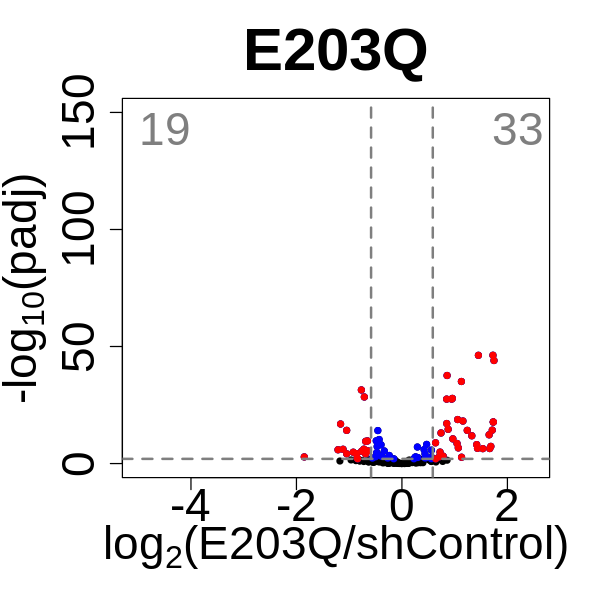

[1] 4


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



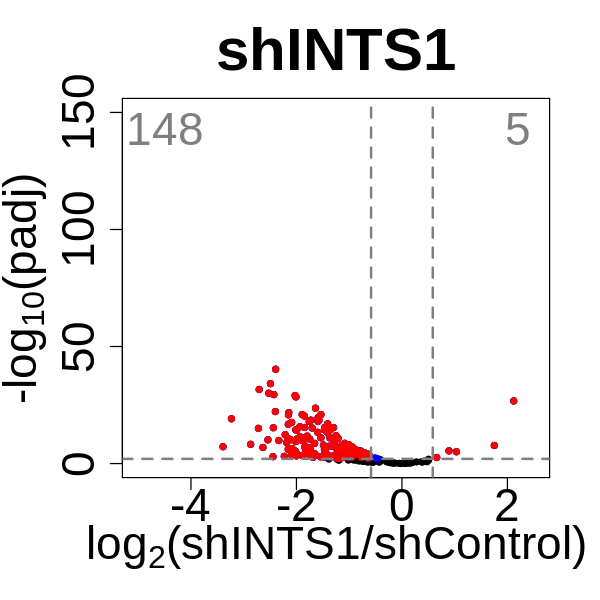

[1] 5


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



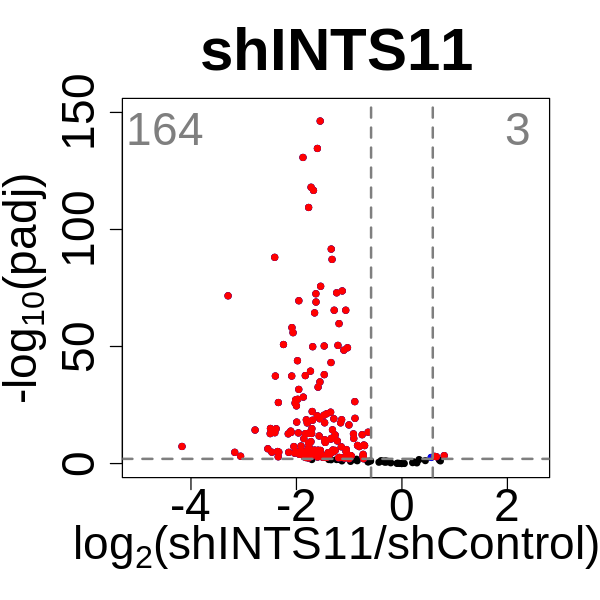

[1] 6


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



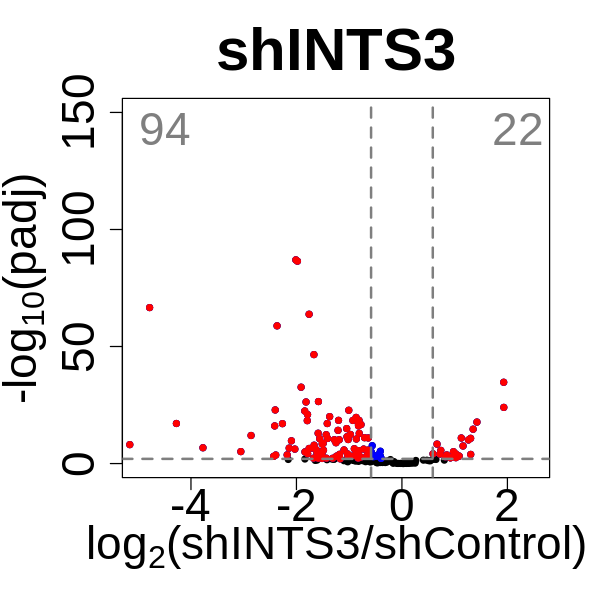

[1] 7


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



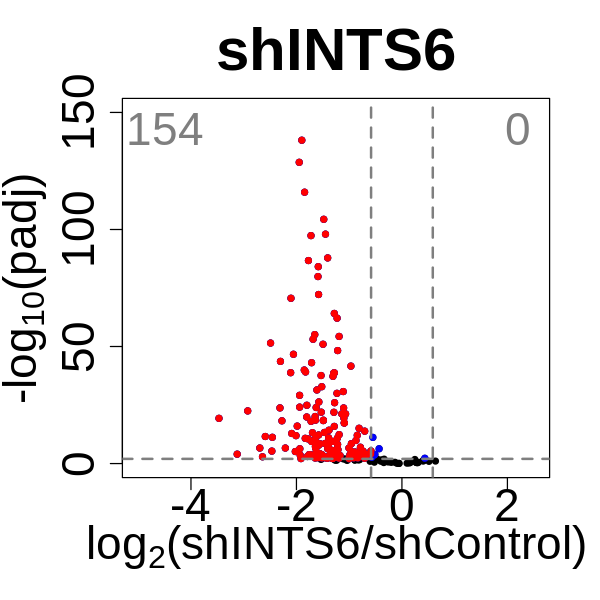

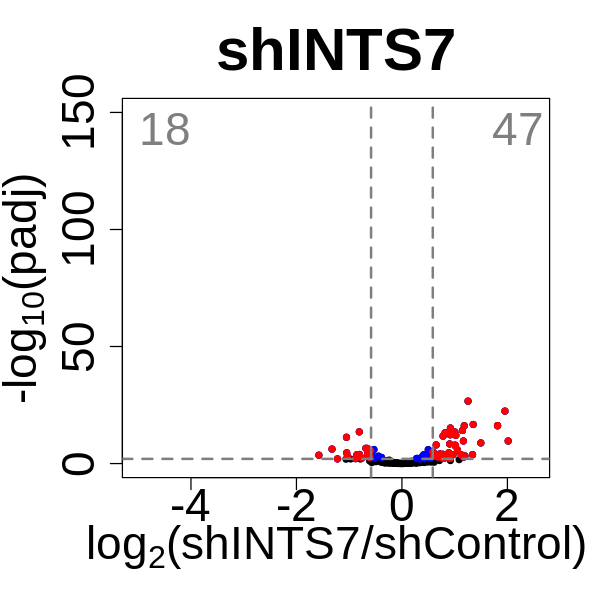

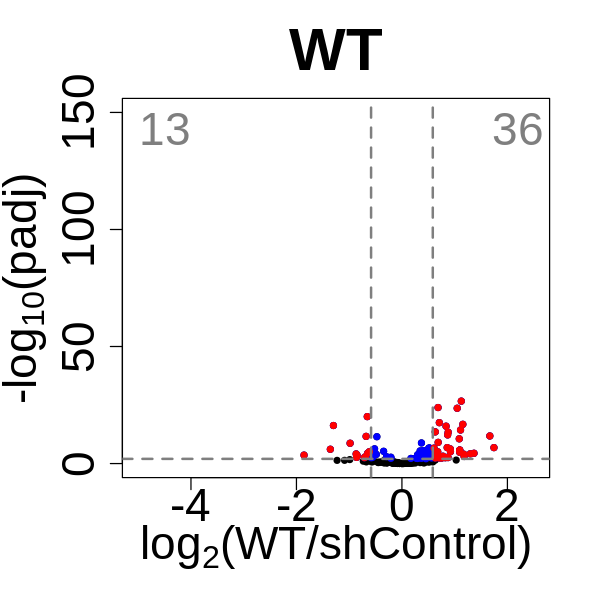

In [108]:
for (i in 1:length(myfiles)){
    print(i)
    #if (i==20) {
    #    next # skips the comparison of shGFP to shGFP
    #}
    
    
    d2 <- DESeqDataSetFromMatrix(countData=get(myfiles[i]), 
                              colData=get(gsub("subs_", "metadata_", myfiles[i])), 
                              design=~dex, tidy = TRUE)
    sizeFactors(d2) <- c(1,1,1,1) # column 6: inputRead normalization

    d2 <- DESeq(d2)
    res_d2 <- results(d2) 
    
    # to extract the baseMean counts per sample for corrlation later
    nam <- gsub("subs_", "means_", myfiles[i])
    assign(nam,assays(d2)[["mu"]])
        

options(repr.plot.width=5, repr.plot.height=5)
#reset par
par(mfrow=c(1,1))


###png(paste0(target.dir, "/volcanoplot_", myfiles[i], "_subsampled.png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/volcanoplot_", myfiles[i], "_subsampled.pdf"), width=5, height=5)
par(mar=c(5.1, 5.1, 4.1, 2.1)) #order: bottom, left, top, and right. 
# Make a basic volcano plot
with(res_d2, plot(log2FoldChange, -log10(padj), pch=20, main=true.names[i], xlim=c(-5,2.5), ylim=c(0,150), 
                     cex.axis =2.3, cex.lab=2.3, cex.main=3, 
                     xlab=bquote('log'[2]* '('*  .(true.names[i])*'/shControl)'),
                     ylab=expression('-log'[10]*'(padj)')))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.05)
with(subset(res_d2, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_d2, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey50")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey50")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey50")
text(-4.5, 143, nrow(res_d2[which(res_d2$log2FoldChange < -log2(1.5) & res_d2$padj <.01),]), cex=2.3, col="grey50")
text(2.2,143, nrow(res_d2[which(res_d2$log2FoldChange > log2(1.5) & res_d2$padj <.01),]), cex=2.3, col="grey50")

#dev.off()

    
nam <- gsub("subs_", "results_", myfiles[i])
assign(nam, res_d2)
    
}

## Volcano siDrosha

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in text.default(0, c(5:1), labels = rownames(res_d2)[grep(paste0(ind, :
“"data" is not a graphical parameter”


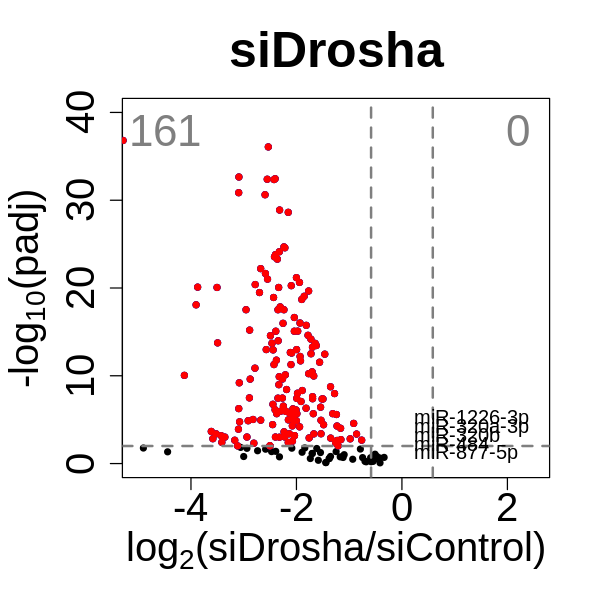

In [109]:
 d2 <- DESeqDataSetFromMatrix(countData=(subs_siDrosha), 
                              colData=(metadata_siDrosha), 
                              design=~dex, tidy = TRUE)
    sizeFactors(d2) <- c(1,1,1,1) # column 6: inputRead normalization

    d2 <- DESeq(d2)
    res_d2 <- results(d2) 
    
    # to extract the baseMean counts per sample for corrlation later
    nam <- "means_siDrosha"
    assign(nam,assays(d2)[["mu"]])
     

options(repr.plot.width=5, repr.plot.height=5)
#reset par
par(mfrow=c(1,1))


###png(paste0(target.dir, "/volcanoplot_subs_siDrosha_subsampled.png.png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/volcanoplot_subs_siDrosha_subsampled.pdf"), width=5, height=5)
par(mar=c(5.1, 5.1, 4.1, 2.1)) #order: bottom, left, top, and right. 
# Make a basic volcano plot
with(res_d2, plot(log2FoldChange, -log10(padj), pch=20, main="siDrosha", xlim=c(-5,2.5), ylim=c(0,40), 
                     cex.axis =2, cex.lab=2, cex.main=2.5, 
                     xlab=bquote('log'[2]* '(siDrosha/siControl)'),
                     ylab=expression('-log'[10]*'(padj)')))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.05)
with(subset(res_d2, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_d2, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey50")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey50")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey50")
text(-4.5, 38, nrow(res_d2[which(res_d2$log2FoldChange < -log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")
text(2.2,38, nrow(res_d2[which(res_d2$log2FoldChange > log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")
text(0, c(5:1),#log2FoldChange ~ -log10(padj),
    labels = rownames(res_d2)[grep(paste0(ind, collapse="|"), rownames(res_d2))], data=res_d2, pos=4)

#dev.off()

nam <- "results_siDrosha"
assign(nam, res_d2)


In [62]:
# Drosha-independent miRNAs
head(results_siDrosha[order(-results_siDrosha$log2FoldChange),], n=10)

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 10 rows and 6 columns
              baseMean     log2FoldChange             lfcSE               stat
             <numeric>          <numeric>         <numeric>          <numeric>
miR-320a-3p        206 -0.337695142959046 0.252889078953578  -1.33534885870274
miR-330-5p        1.75 -0.415034070538502  1.95435452586405 -0.212363757468727
miR-320b         77.75 -0.420450584503686 0.340313066234601  -1.23548175553695
miR-484         114.75 -0.475733030075114 0.320552867622378  -1.48410161981625
miR-877-5p      164.25 -0.510307649436016 0.287177757483637  -1.77697483923382
miR-4521            28 -0.520831380001188 0.518432729984405  -1.00462673337938
miR-1226-3p          8 -0.547486035869633 0.920033401394397 -0.595071912649982
miR-126-5p           5 -0.584960256176156  1.12037217020277  -0.52211244775054
miR-29b-1-5p      34.5  -0.59367904244846 0.465643118950265  -1.27496578020274
miR

## Volcano shControl noDox vs Dox

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



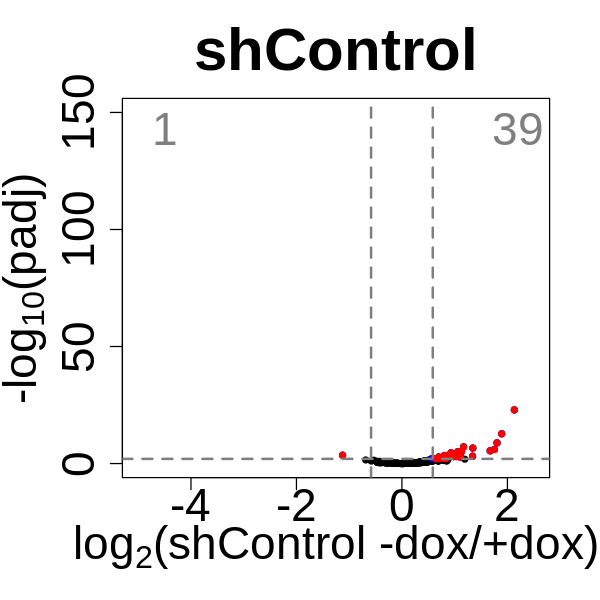

In [111]:
 d2 <- DESeqDataSetFromMatrix(countData=(subs_shControl_noDox), 
                              colData=(metadata_shControl_noDox), 
                              design=~dex, tidy = TRUE)
    sizeFactors(d2) <- c(1,1,1,1) # column 6: inputRead normalization

    d2 <- DESeq(d2)
    res_d2 <- results(d2) 
    
    # to extract the baseMean counts per sample for corrlation later
    nam <- "means_shControl_noDox"
    assign(nam,assays(d2)[["mu"]])
     

options(repr.plot.width=5, repr.plot.height=5)
#reset par
par(mfrow=c(1,1))


###png(paste0(target.dir, "/volcanoplot_subs_shControl_noDox_subsampled.png.png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/volcanoplot_subs_shControl_noDox.pdf"), width=5, height=5)
par(mar=c(5.1, 5.1, 4.1, 2.1)) #order: bottom, left, top, and right. 
# Make a basic volcano plot
with(res_d2, plot(log2FoldChange, -log10(padj), pch=20, main="shControl", xlim=c(-5,2.5), ylim=c(0,150),
                     cex.axis =2.3, cex.lab=2.3, cex.main=3, 
                     xlab=bquote('log'[2]* '(shControl -dox/+dox)'),
                     ylab=expression('-log'[10]*'(padj)')))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.05)
with(subset(res_d2, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_d2, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey50")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey50")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey50")
text(-4.5, 143, nrow(res_d2[which(res_d2$log2FoldChange < -log2(1.5) & res_d2$padj <.01),]), cex=2.3, col="grey50")
text(2.2,143, nrow(res_d2[which(res_d2$log2FoldChange > log2(1.5) & res_d2$padj <.01),]), cex=2.3, col="grey50")
#with(drosha.indep, text(log2FoldChange ~ -log10(padj), labels = row.names(drosha.indep), pos = 4))

#dev.off()

nam <- "results_shControl_noDox"
assign(nam, res_d2)


# Boxplot of deseq2 result

## boxplot only shINTS - shControl

In [120]:
ls(pattern="box_")


my_box <- c("box_shControl_noDox", "box_shINTS1","box_shINTS3", "box_shINTS6","box_shINTS7", "box_shINTS11")
my_box


[1] "box_E203Q"           "box_shControl_noDox" "box_shINTS1"        
[4] "box_shINTS11"        "box_shINTS3"         "box_shINTS6"        
[7] "box_shINTS7"         "box_siDrosha"        "box_WT"

[1] "box_shControl_noDox" "box_shINTS1"         "box_shINTS3"        
[4] "box_shINTS6"         "box_shINTS7"         "box_shINTS11"

In [122]:
final <- data.frame(matrix(ncol = 2, nrow = 1))
colnames(final) <- c("log2FC", "item")

for (i in 1:length(my_box)){
    final <- rbind(final, get(my_box[i]))
}

final <- final[-1,]


head(final)

((unique(final$item)))

,log2FC,item
,<dbl>,<chr>
2,-0.14952560,shControl_noDox
3,0.77878593,shControl_noDox
4,0.15057112,shControl_noDox
5,0.83628035,shControl_noDox
6,-0.32576144,shControl_noDox
7,-0.09285597,shControl_noDox


[1] "shControl_noDox" "shINTS1"         "shINTS3"         "shINTS6"        
[5] "shINTS7"         "shINTS11"

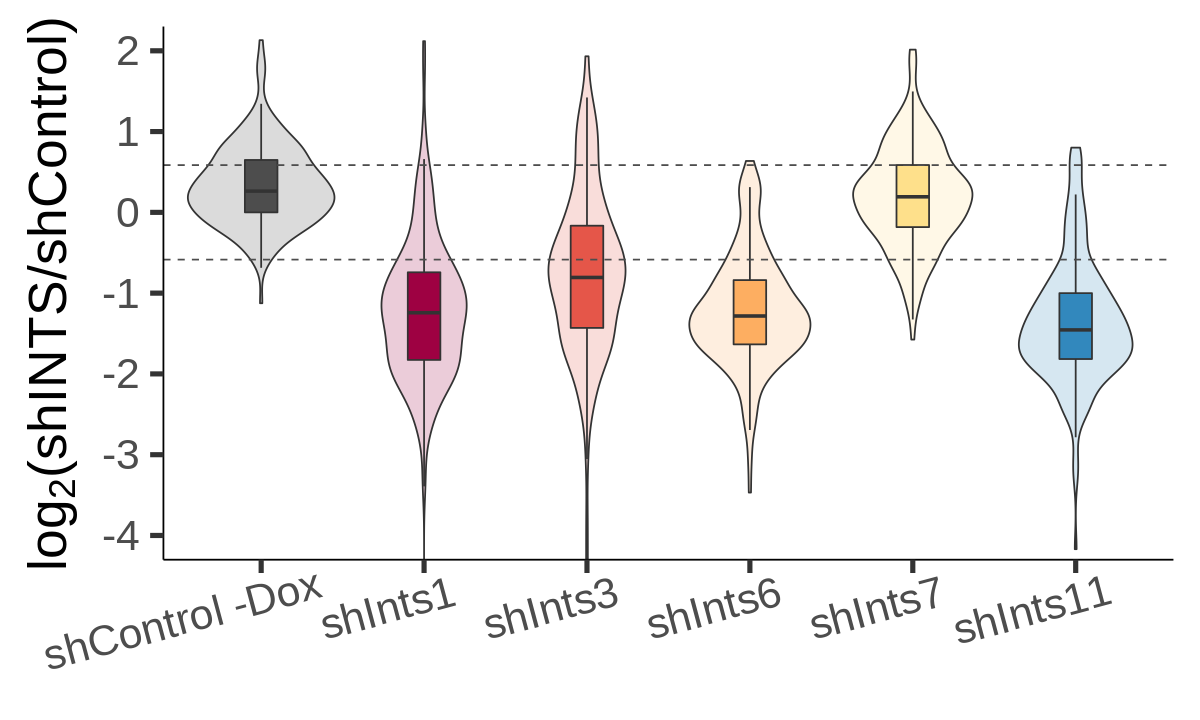

In [81]:
options(repr.plot.width=10, repr.plot.height=6)

INTScolors <- c(col_shgfp, col_sh1, col_sh3, col_sh6, col_sh7, col_sh11)


ggplot(data = final, aes(x = item, y = log2FC, fill=item)) +
        theme_bw(base_size = 32) +
        #ggtitle("164 miRNAs; log2FC all samples") +
        #theme(plot.title = element_text(hjust = 0.5)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.text.x = element_text()) +
        theme(legend.position="none", axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 0.8)) +
        scale_y_continuous(name=expression('log'[2]*'(shINTS/shControl)'), breaks =seq(from =-4, to=2,by=1)) +
        coord_cartesian(ylim=c(-4,2))+
        geom_violin(alpha=0.2) +
        geom_boxplot(width = 0.2, fill =INTScolors, outlier.color=NA) +
        #geom_dotplot(binaxis="y", stackdir = "center", binwidth = .09) +
        geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun.y=mean, geom="point", size = 3, color="black") +
        scale_x_discrete(limits=c(unique(final$item)), 
                         labels= c("shControl -Dox", "shINTS1", "shINTS3", "shINTS6", "shINTS7", "shINTS11")) +
        scale_fill_manual(values=INTScolors, limits=c(unique(final$item)))
       # scale_fill_manual(values=getPalette(colourCount),limits=c(unique(final$item))) # limits orders colors as wanted!!! very useful!
#ggsave(paste0(target.dir, "/boxplot_deseq2.pdf"),  width=10, height=6)
###ggsave(paste0(target.dir, "/boxplot_deseq2_Fig1_INTS.png"),  width=50, height=20, unit="cm", dpi=600)

In [82]:
## one-way anova (from http://www.sthda.com/english/wiki/one-way-anova-test-in-r)

In [124]:
# Compute the analysis of variance
res.aov <- aov(log2FC ~ item, data = final)
# Summary of the analysis
summary(res.aov)

              Df Sum Sq Mean Sq F value Pr(>F)    
item           5  591.7  118.33   183.3 <2e-16 ***
Residuals   1224  790.2    0.65                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [125]:
TukeyHSD(res.aov)

#capture.output(TukeyHSD(res.aov),file="results_pics/boxplot_deseq2_pvalue.txt")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = log2FC ~ item, data = final)

$item
                                diff         lwr         upr     p adj
shINTS1-shControl_noDox  -1.58949680 -1.81602219 -1.36297142 0.0000000
shINTS11-shControl_noDox -1.68714811 -1.91367349 -1.46062272 0.0000000
shINTS3-shControl_noDox  -1.09294035 -1.31946574 -0.86641497 0.0000000
shINTS6-shControl_noDox  -1.55176056 -1.77828594 -1.32523517 0.0000000
shINTS7-shControl_noDox  -0.13176902 -0.35829440  0.09475637 0.5584880
shINTS11-shINTS1         -0.09765130 -0.32417669  0.12887408 0.8219455
shINTS3-shINTS1           0.49655645  0.27003107  0.72308183 0.0000000
shINTS6-shINTS1           0.03773625 -0.18878914  0.26426163 0.9969880
shINTS7-shINTS1           1.45772779  1.23120240  1.68425317 0.0000000
shINTS3-shINTS11          0.59420775  0.36768237  0.82073314 0.0000000
shINTS6-shINTS11          0.13538755 -0.09113783  0.36191293 0.5280771
shINTS7-shINTS11 

# create table for supplement with log2FC 

In [126]:
my_results <- c("results_shControl_noDox", "results_shINTS1","results_shINTS3", "results_shINTS6","results_shINTS7", "results_shINTS11", "results_WT", "results_E203Q",
           "results_siDrosha")
my_results
head(results_siDrosha)

[1] "results_shControl_noDox" "results_shINTS1"        
[3] "results_shINTS3"         "results_shINTS6"        
[5] "results_shINTS7"         "results_shINTS11"       
[7] "results_WT"              "results_E203Q"          
[9] "results_siDrosha"

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
           baseMean    log2FoldChange             lfcSE              stat
          <numeric>         <numeric>         <numeric>         <numeric>
let-7a-5p  47539.75 -1.56109648096402 0.218501456532276 -7.14455869420449
let-7a-3p       302  -1.9970157256008 0.262473374498887 -7.60845068347789
let-7b-5p  18974.75 -1.72373644034478 0.231222910615158 -7.45486870552254
let-7b-3p    201.25 -2.09133986543862 0.279523560056433 -7.48180176660744
let-7c-5p   2936.75 -1.81407415986618 0.215261317133387 -8.42731143720578
let-7d-5p    4332.5  -2.3191324068203 0.200436644656022 -11.5704012647002
                        pvalue                 padj
                     <numeric>            <numeric>
let-7a-5p 9.02854740536605e-13 2.86374238013955e-12
let-7a-3p 2.77401064125738e-14 1.03358286418738e-13
let-7b-5p 8.99573672816756e-14 3.09514331494579e-13
let-7b-3p 7.331047238

In [127]:
table <- as.data.frame(results_shControl_noDox[,1:2])
colnames(table) <- c("baseMean", "shControl_noDox")
table$names <- rownames(table)
table <- table[,c(3,2)]
head(table)

,names,shControl_noDox
,<chr>,<dbl>
let-7a-5p,let-7a-5p,-0.14952560
let-7a-3p,let-7a-3p,0.77878593
let-7b-5p,let-7b-5p,0.15057112
let-7b-3p,let-7b-3p,0.83628035
let-7c-5p,let-7c-5p,-0.32576144
let-7d-5p,let-7d-5p,-0.09285597


In [128]:
i=2
t <- as.data.frame(get(my_results[i]))[,1:2]
t$names <- rownames(t)
test <- table %>%
    left_join(t[2:3], by="names") %>%
    rename("log2FoldChange" = my_results[i])

head(test)

,names,shControl_noDox,results_shINTS1
,<chr>,<dbl>,<dbl>
1,let-7a-5p,-0.14952560,-0.5117080
2,let-7a-3p,0.77878593,0.2778877
3,let-7b-5p,0.15057112,-0.4618078
4,let-7b-3p,0.83628035,0.4191774
5,let-7c-5p,-0.32576144,-1.4612044
6,let-7d-5p,-0.09285597,-0.7481863


In [129]:
for (i in 2:length(my_results)){
      t <- as.data.frame(get(my_results[i]))[,1:2]
      t$names <- rownames(t)
    table <- table %>%
    left_join(t[2:3], by="names") %>%
    rename("log2FoldChange" = my_results[i])
}

head(table)


,names,shControl_noDox,results_shINTS1,results_shINTS3,results_shINTS6,results_shINTS7,results_shINTS11,results_WT,results_E203Q,results_siDrosha
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-5p,-0.14952560,-0.5117080,-0.7756004,-1.4819600,-0.11177230,-1.1312437,-0.01369273,0.08141055,-1.561096
2,let-7a-3p,0.77878593,0.2778877,0.7213227,-1.0047222,0.39186844,-0.2916034,0.66890824,0.96540713,-1.997016
3,let-7b-5p,0.15057112,-0.4618078,-0.8139887,-0.9672920,-0.53033112,-1.0651818,0.06675128,-0.15443692,-1.723736
4,let-7b-3p,0.83628035,0.4191774,0.5112530,-0.6100532,-0.35548043,0.4437694,0.92046134,1.32524092,-2.091340
5,let-7c-5p,-0.32576144,-1.4612044,-2.0115634,-1.9471890,-0.08618189,-1.7225672,-0.47521142,-0.43171327,-1.814074
6,let-7d-5p,-0.09285597,-0.7481863,-0.8235449,-1.8982305,0.27837214,-1.3247589,0.03117304,-0.13686532,-2.319132


In [130]:
nrow(table)

[1] 205

In [91]:
#write.table(table, file="log2FC_205_miRNAs_HeLa_all_samples.csv", col.names=TRUE, row.names=FALSE, sep="\t", quote=FALSE)

# correlate all log2FC with each other (esp. shINTS6 with shINTS11)

In [140]:
my_results
head(results_shINTS6)

[1] "results_shControl_noDox" "results_shINTS1"        
[3] "results_shINTS3"         "results_shINTS6"        
[5] "results_shINTS7"         "results_shINTS11"       
[7] "results_WT"              "results_E203Q"          
[9] "results_siDrosha"

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 6 columns
           baseMean     log2FoldChange              lfcSE              stat
          <numeric>          <numeric>          <numeric>         <numeric>
let-7a-5p  30621.25  -1.48195997662825   0.06751701876573 -21.9494285103189
let-7a-3p    229.25   -1.0047222405671  0.189215184260764 -5.30994510029625
let-7b-5p  11881.25 -0.967291999139969 0.0701225148078035 -13.7943141627363
let-7b-3p       108 -0.610053228314141  0.254978503680791 -2.39256729295842
let-7c-5p   3588.75  -1.94718904314447 0.0798223915886523 -24.3940203292692
let-7d-5p   5661.25  -1.89823052729382 0.0750422022210658 -25.2955066763879
                         pvalue                  padj
                      <numeric>             <numeric>
let-7a-5p  8.7696907585096e-107 4.49446651373617e-105
let-7a-3p  1.09658261879696e-07   2.3589669807385e-07
let-7b-5p  2.75762978937828e-43  2.35547544509395

In [141]:
df.cor <- as.data.frame(get(my_results[1])[,1:2])
df.cor$miRNA <- rownames(df.cor)
colnames(df.cor) <- gsub("log2FoldChange", paste0("log2FC_", gsub("results_", "", my_results[1])), colnames(df.cor))
r <- as.data.frame(get(my_results[2])[,1:2])
r$miRNA <- rownames(r)
head(r)
df.cor <- merge(df.cor, r, by="miRNA")
head(df.cor)


,baseMean,log2FoldChange,miRNA
,<dbl>,<dbl>,<chr>
let-7a-5p,38364.25,-0.5117080,let-7a-5p
let-7a-3p,338.50,0.2778877,let-7a-3p
let-7b-5p,13568.25,-0.4618078,let-7b-5p
let-7b-3p,152.50,0.4191774,let-7b-3p
let-7c-5p,3884.75,-1.4612044,let-7c-5p
let-7d-5p,7121.25,-0.7481863,let-7d-5p


,miRNA,baseMean.x,log2FC_shControl_noDox,baseMean.y,log2FoldChange
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-3p,415.50,0.7787859,338.50,0.2778877
2,let-7a-5p,42877.50,-0.1495256,38364.25,-0.5117080
3,let-7b-3p,181.75,0.8362803,152.50,0.4191774
4,let-7b-5p,16586.25,0.1505711,13568.25,-0.4618078
5,let-7c-5p,5123.50,-0.3257614,3884.75,-1.4612044
6,let-7d-3p,1188.25,0.5373097,666.25,-1.4172711


In [156]:
df.cor <- as.data.frame(get(my_results[1])[,1:2])
df.cor$miRNA <- rownames(df.cor)
colnames(df.cor) <- gsub("log2FoldChange", paste0("log2FC_", gsub("results_", "", my_results[1])), colnames(df.cor))

for (i in 2:length(my_results)){
    
    r <- as.data.frame(get(my_results[i])[,1:2])
    r$miRNA <- rownames(r)
    df.cor <- merge(df.cor, r, by="miRNA")
    colnames(df.cor) <- gsub("log2FoldChange", paste0("log2FC_", gsub("results_", "", my_results[i])), colnames(df.cor))
    df.cor <- df.cor[,-grep("baseMean", colnames(df.cor))]
}

head(df.cor)

# save for heatmap below
heat.map <- df.cor

,miRNA,log2FC_shControl_noDox,log2FC_shINTS1,log2FC_shINTS3,log2FC_shINTS6,log2FC_shINTS7,log2FC_shINTS11,log2FC_WT,log2FC_E203Q,log2FC_siDrosha
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,let-7a-3p,0.7787859,0.2778877,0.7213227,-1.0047222,0.39186844,-0.2916034,0.66890824,0.96540713,-1.997016
2,let-7a-5p,-0.1495256,-0.5117080,-0.7756004,-1.4819600,-0.11177230,-1.1312437,-0.01369273,0.08141055,-1.561096
3,let-7b-3p,0.8362803,0.4191774,0.5112530,-0.6100532,-0.35548043,0.4437694,0.92046134,1.32524092,-2.091340
4,let-7b-5p,0.1505711,-0.4618078,-0.8139887,-0.9672920,-0.53033112,-1.0651818,0.06675128,-0.15443692,-1.723736
5,let-7c-5p,-0.3257614,-1.4612044,-2.0115634,-1.9471890,-0.08618189,-1.7225672,-0.47521142,-0.43171327,-1.814074
6,let-7d-3p,0.5373097,-1.4172711,-0.7251097,-1.5202176,-0.03769001,-1.5547748,0.39121870,0.21781467,-2.416718


In [157]:
rownames(df.cor) <- df.cor[,1]
df.cor <- df.cor[,-1]

In [158]:
# correlate the samples among each other
df.cor.matrix <- df.cor
head(df.cor.matrix)
nrow(df.cor.matrix)
t <- matrix(NA, nrow=ncol(df.cor.matrix), ncol = ncol(df.cor.matrix))
colnames(t) <- colnames(df.cor.matrix)
rownames(t) <- colnames(df.cor.matrix)

for (i in 1:ncol(df.cor.matrix)){
    for (j in 1:ncol(df.cor.matrix)){
        var <- cor(df.cor.matrix[,i], df.cor.matrix[,j], method = "spearman", use="complete.obs")
        t[i,j] <- var        
    }
}
t

,log2FC_shControl_noDox,log2FC_shINTS1,log2FC_shINTS3,log2FC_shINTS6,log2FC_shINTS7,log2FC_shINTS11,log2FC_WT,log2FC_E203Q,log2FC_siDrosha
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
let-7a-3p,0.7787859,0.2778877,0.7213227,-1.0047222,0.39186844,-0.2916034,0.66890824,0.96540713,-1.997016
let-7a-5p,-0.1495256,-0.5117080,-0.7756004,-1.4819600,-0.11177230,-1.1312437,-0.01369273,0.08141055,-1.561096
let-7b-3p,0.8362803,0.4191774,0.5112530,-0.6100532,-0.35548043,0.4437694,0.92046134,1.32524092,-2.091340
let-7b-5p,0.1505711,-0.4618078,-0.8139887,-0.9672920,-0.53033112,-1.0651818,0.06675128,-0.15443692,-1.723736
let-7c-5p,-0.3257614,-1.4612044,-2.0115634,-1.9471890,-0.08618189,-1.7225672,-0.47521142,-0.43171327,-1.814074
let-7d-3p,0.5373097,-1.4172711,-0.7251097,-1.5202176,-0.03769001,-1.5547748,0.39121870,0.21781467,-2.416718


[1] 205

,log2FC_shControl_noDox,log2FC_shINTS1,log2FC_shINTS3,log2FC_shINTS6,log2FC_shINTS7,log2FC_shINTS11,log2FC_WT,log2FC_E203Q,log2FC_siDrosha
log2FC_shControl_noDox,1.00000000,-0.140832662,-0.07207880,-0.05406955,0.26876675,-0.1480536,0.5605685,0.1537354,0.057053466
log2FC_shINTS1,-0.14083266,1.000000000,0.72040309,0.40323453,0.47636224,0.6660981,0.1161952,0.3241534,0.005149905
log2FC_shINTS3,-0.07207880,0.720403088,1.00000000,0.54001938,0.54326213,0.7798981,0.3175175,0.5504747,-0.016666183
log2FC_shINTS6,-0.05406955,0.403234535,0.54001938,1.00000000,0.15489927,0.6005118,0.2664581,0.6156376,0.074457010
log2FC_shINTS7,0.26876675,0.476362238,0.54326213,0.15489927,1.00000000,0.3077238,0.2733113,0.1108338,-0.013726864
log2FC_shINTS11,-0.14805363,0.666098117,0.77989813,0.60051176,0.30772376,1.0000000,0.2813026,0.5752119,0.050341396
log2FC_WT,0.56056846,0.116195170,0.31751748,0.26645805,0.27331129,0.2813026,1.0000000,0.6714930,0.069946898
log2FC_E203Q,0.15373542,0.324153426,0.55047475,0.61563765,0.11083376,0.5752119,0.6714930,1.0000000,0.117612209
log2FC_siDrosha,0.05705347,0.005149905,-0.01666618,0.07445701,-0.01372686,0.0503414,0.0699469,0.1176122,1.000000000


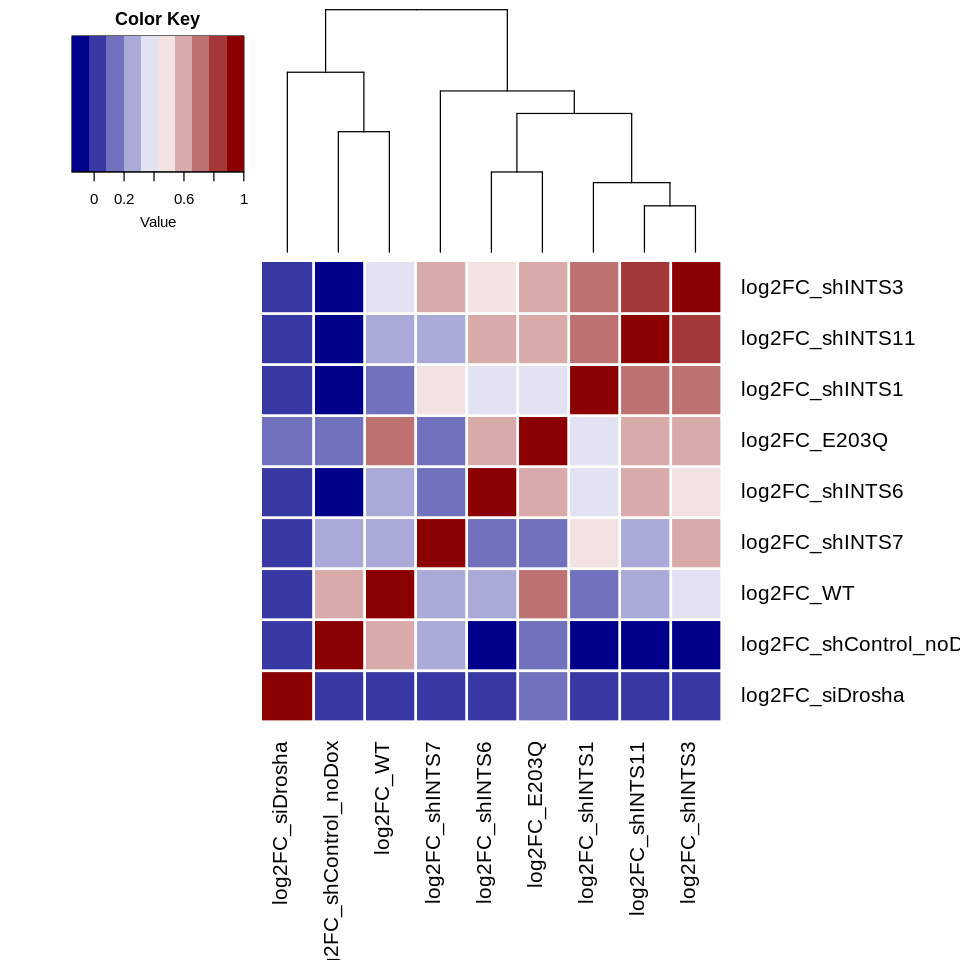

In [159]:
options(repr.plot.width=8, repr.plot.height=8)

col<- colorRampPalette(c("darkblue", "white", "darkred"))(10)


#png(paste0(target.dir, "/heatmap_correleation_log2FC_all.png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/heatmap_correleation_log2FC_all.pdf"), width=7, height=7)
#par(oma=c(5,1,5,2)) #bottom, left, top, right
heatmap.2(x = t, col = col, density.info = "none", trace = "none", symm=F,symkey=F,symbreaks=F, scale="none",
           dendrogram = c("column"), breaks =11,
          colsep=c(1:11), rowsep=(1:11), sepcolor="white", sepwidth=c(0.03,0.03),
       margins = c(12,12))
#dev.off()


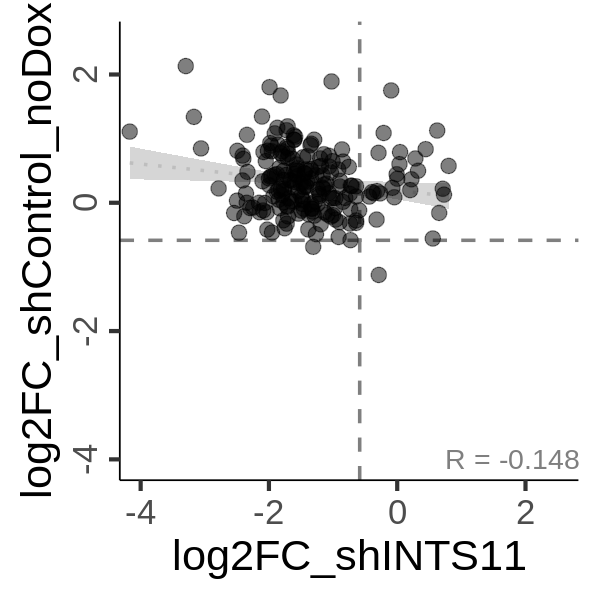

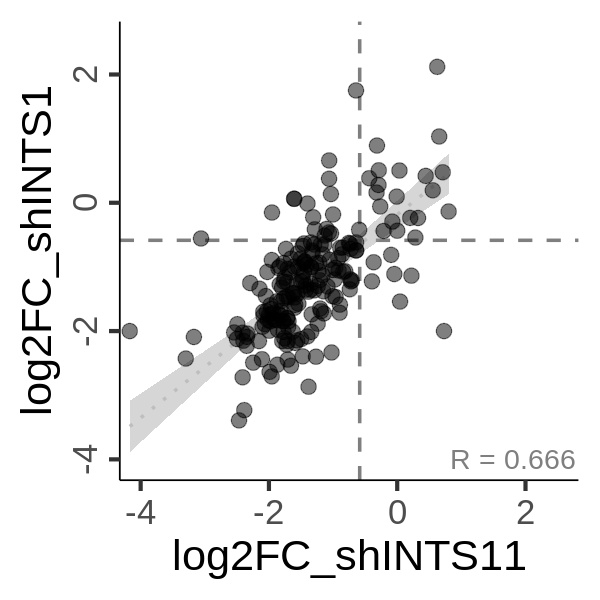

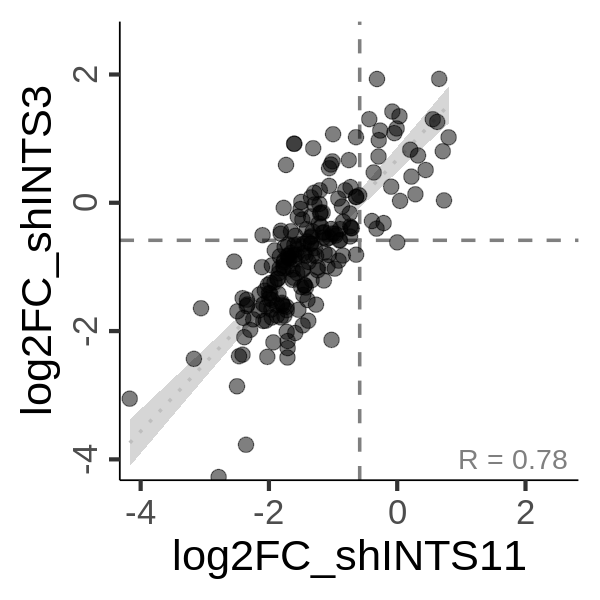

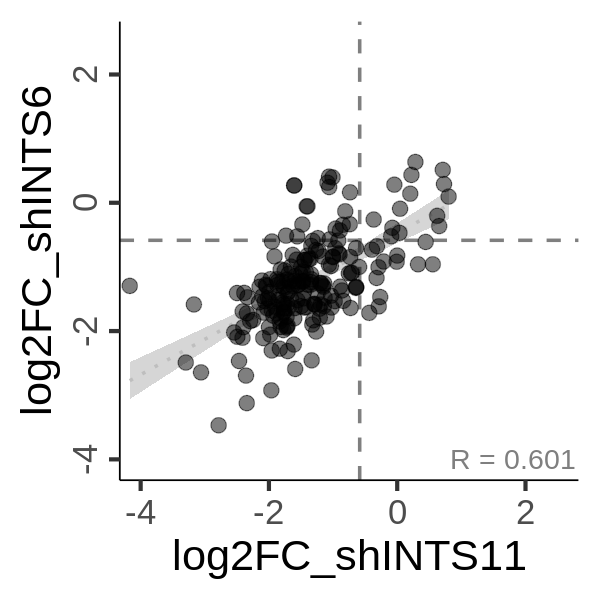

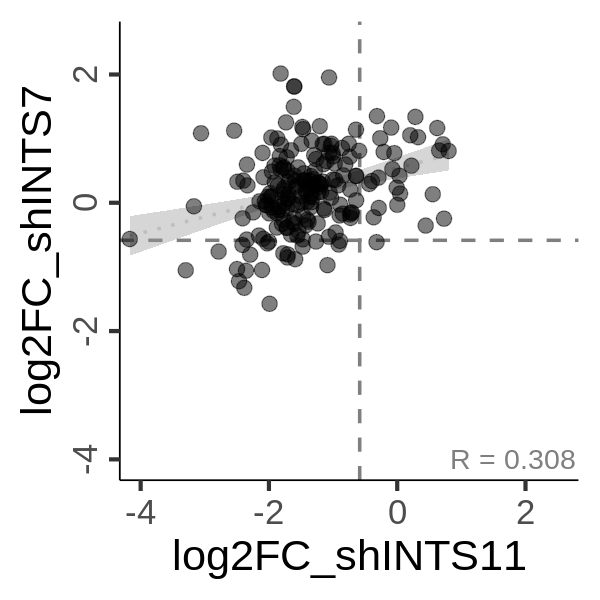

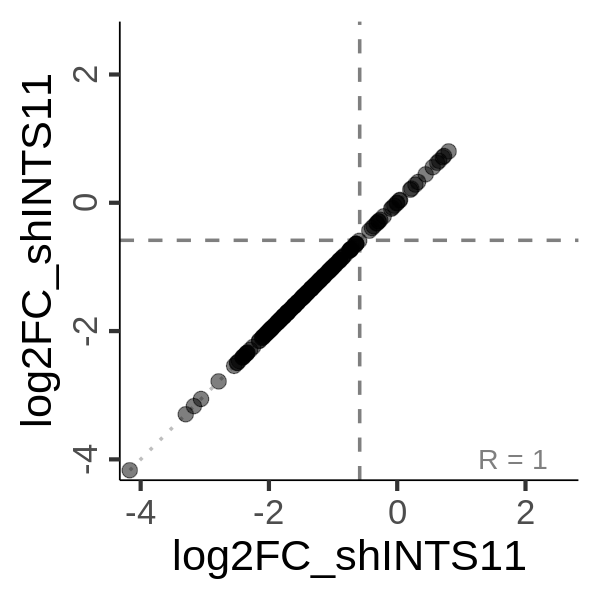

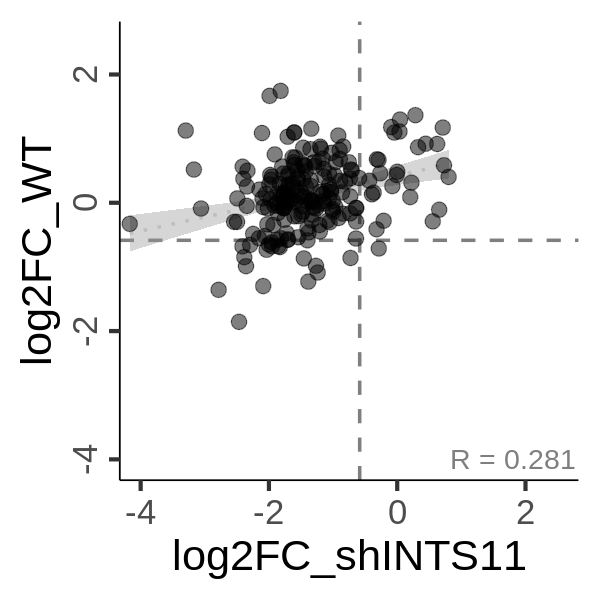

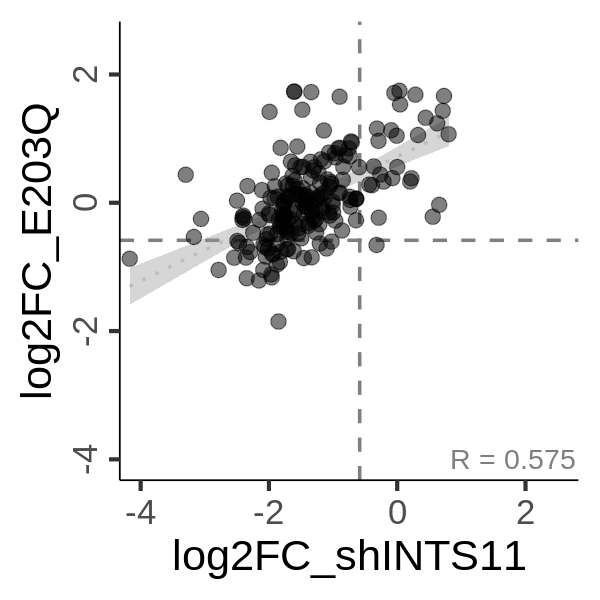

In [160]:
# INTS11 x-axis vs rest

options(repr.plot.width=5, repr.plot.height=5)

xaxis=grep("shINTS11$", colnames(df.cor))

for (i in xaxis){
    for(j in 1:(ncol(df.cor)-1)) {
        sp <- round(cor(df.cor[,i], df.cor[,j], method="spearman", use="complete.obs"), digits=3)
        xlab <- colnames(df.cor[i])
        ylab <- colnames(df.cor[j])
        
        p <- ggplot(df.cor, aes(x=df.cor[,i], y=df.cor[,j])) + 
            theme_bw(base_size = 26) +
            #ggtitle("shControl") +
            theme(plot.title = element_text(hjust = '0.5')) +
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                  panel.background = element_blank(), panel.border = element_blank()) +
            theme(axis.line = element_line(colour = "black", size = 0.5),
                  axis.text.x = element_text(angle = 0, hjust=0.5), axis.text.y = element_text(angle = 90, hjust=0.5)) +
            xlab(xlab) +
            ylab(ylab) +
            coord_cartesian(ylim=c(-4,2.5), xlim=c(-4,2.5))+
            geom_hline(yintercept=-log2(1.5), size=1, linetype="dashed", color="grey50") +
            geom_vline(xintercept=-log2(1.5), size=1, linetype="dashed", color="grey50") +
            geom_smooth(method="lm", formula= 'y ~ x', se=TRUE, span=1, size=1, linetype="dotted", color="grey") +
            geom_point(size=4, alpha=0.5) +
            annotate(geom="text", x=1.8, y=-4, label=paste0("R = ", sp),
              color="grey50", size=6)

        
        print(p)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA.pdf"), width = 5, height = 5)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA.png"), width = 12, height = 12, units="cm", dpi=1200)
    }
}
    
    
    


In [161]:
# label miRNAs that are not regulated by either shINTS6 and shINTS11
df.cor$no_reg <- ifelse(df.cor$log2FC_shINTS6>-log2(1.5) & df.cor$log2FC_shINTS11>-log2(1.5), "no_reg", "reg")

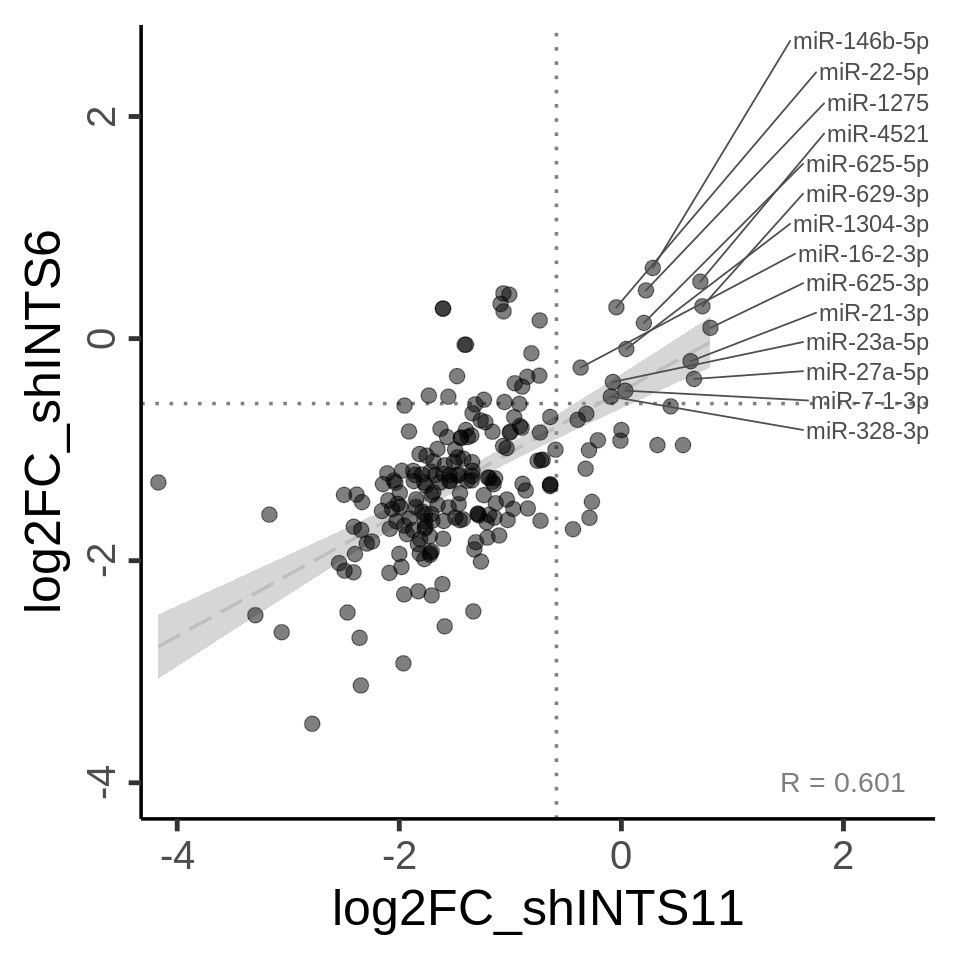

In [162]:
# INTS11 x-axis vs shINTS6

options(repr.plot.width=8, repr.plot.height=8)

xaxis=grep("shINTS11$", colnames(df.cor))
yaxis=grep("shINTS6$", colnames(df.cor))

for (i in xaxis){
    for(j in yaxis) {
        sp <- round(cor(df.cor[,i], df.cor[,j], method="spearman", use="complete.obs"), digits=3)
        xlab <- colnames(df.cor[i])
        ylab <- colnames(df.cor[j])
        
        p <- ggplot(df.cor, aes(x=df.cor[,i], y=df.cor[,j])) + 
            theme_bw(base_size = 30) +
            #ggtitle("shControl") +
            theme(plot.title = element_text(hjust = '0.5')) +
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                  panel.background = element_blank(), panel.border = element_blank()) +
            theme(axis.line = element_line(colour = "black", size = 1),
                  axis.text.x = element_text(angle = 0, hjust=0.5), axis.text.y = element_text(angle = 90, hjust=0.5)) +
            xlab(xlab) +
            ylab(ylab) +
            coord_cartesian(ylim=c(-4,2.5), xlim=c(-4,2.5))+
            geom_hline(yintercept=-log2(1.5), size=1, linetype="dotted", color="grey50") +
            geom_vline(xintercept=-log2(1.5), size=1, linetype="dotted", color="grey50") +
            geom_smooth(method="lm", formula= 'y ~ x', se=TRUE, span=1, size=1, linetype="longdash", color="grey") +
            geom_point(size=4, alpha=0.5) +
            annotate(geom="text", x=2, y=-4, label=paste0("R = ", sp),
              color="grey50", size=6)+
            geom_text_repel(aes(label=ifelse(no_reg=="no_reg", rownames(df.cor), '')), 
                         nudge_x=3.5, nudge_y=1, hjust=1, direction = "y", color="grey30", size=5)

        print(p)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA_labnoreg.png"), width = 15, height = 15, units= "cm", dpi=600)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA_labnoreg.pdf"), width = 15, height = 15, units= "cm")
        
    }
}
    
    
    


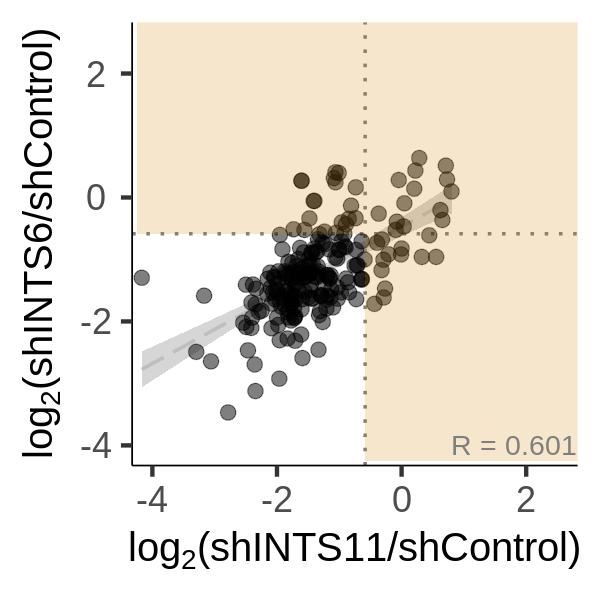

In [164]:
## Figure 1 h


# INTS11 x-axis vs shINTS6

options(repr.plot.width=5, repr.plot.height=5)

xaxis=grep("shINTS11$", colnames(df.cor))
yaxis=grep("shINTS6$", colnames(df.cor))

for (i in xaxis){
    for(j in yaxis) {
        sp <- round(cor(df.cor[,i], df.cor[,j], method="spearman", use="complete.obs"), digits=3)
        xlab <- colnames(df.cor[i])
        ylab <- colnames(df.cor[j])
        
        p <- ggplot(df.cor, aes(x=df.cor[,i], y=df.cor[,j])) + 
            theme_bw(base_size = 27) +
            #ggtitle("shControl") +
            theme(plot.title = element_text(hjust = '0.5')) +
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                  panel.background = element_blank(), panel.border = element_blank()) +
            theme(axis.line = element_line(colour = "black", size = 0.5),
                  axis.text.x = element_text(angle = 0, hjust=0.5), axis.text.y = element_text(angle = 0, hjust=0.5),
                 axis.title=element_text(size=24)) +
            xlab(expression('log'[2]*'(shINTS11/shControl)')) +
            ylab(expression('log'[2]*'(shINTS6/shControl)')) +
            coord_cartesian(ylim=c(-4,2.5), xlim=c(-4,2.5))+
            geom_hline(yintercept=-log2(1.5), size=1, linetype="dotted", color="grey50") +
            geom_vline(xintercept=-log2(1.5), size=1, linetype="dotted", color="grey50") +
            geom_smooth(method="lm", formula= 'y ~ x', se=TRUE, span=1, size=1, linetype="longdash", color="grey") +
            geom_point(size=4, alpha=0.5) +
            annotate("rect", xmin = -4.25, xmax = -log2(1.5), ymin = -log2(1.5), ymax = 2.9,alpha = .2,fill = "orange3")+
            annotate("rect", ymin = -4.25, ymax = 2.9, xmin = -log2(1.5), xmax = 2.9,alpha = .2,fill = "orange3")+
            annotate(geom="text", x=1.8, y=-4, label=paste0("R = ", sp),
              color="grey50", size=6) 

            #geom_text_repel(aes(label=ifelse(no_reg=="no_reg", rownames(df.cor.mirna), '')), 
            #             nudge_x=3.5, nudge_y=1, hjust=1, direction = "y", color="grey30", size=5)

        print(p)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA.png"), width = 12, height = 12, units= "cm", dpi=1200)
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA.pdf"), width = 5, height = 5, units= "cm")
        
    }
}
   




In [167]:
# label drosha independent miRNAs
ind

df.cor$indep <- ifelse(grepl(paste(ind, collapse="|"), rownames(df.cor)), "yes","no")
df.cor[df.cor$indep=="yes",]

# label 2 non-regulated miRNA in siDrosha that I also observe
df.cor$drosha <- ifelse(df.cor$log2FC_siDrosha>-log2(1.49) & df.cor$indep=="no", "yes", "no")
df.cor$drosha

[1] "miR-877"  "miR-320a" "miR-320b" "miR-484"  "miR-7706" "miR-3615" "miR-1254"
[8] "miR-1226"

,log2FC_shControl_noDox,log2FC_shINTS1,log2FC_shINTS3,log2FC_shINTS6,log2FC_shINTS7,log2FC_shINTS11,log2FC_WT,log2FC_E203Q,log2FC_siDrosha,no_reg,indep
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
miR-1226-3p,1.1926453,-2.444783,-2.155275,-1.914268,0.05771606,-1.707817,1.0291466,-0.2571571,-0.5474860,reg,yes
miR-320a-3p,0.8442581,-2.154405,-2.265437,-2.312358,-0.80495626,-1.707659,0.4144373,0.2666307,-0.3376951,reg,yes
miR-320b,1.0296254,-2.184968,-2.030246,-2.590961,-0.87946597,-1.590961,0.7054963,0.5829658,-0.4204506,reg,yes
miR-484,1.3440636,-2.438005,-1.003602,-1.212830,-1.04754535,-2.108299,1.0872513,0.1980318,-0.4757330,reg,yes
miR-877-5p,0.8907330,-1.654503,-1.665229,-2.923964,1.01687391,-1.963134,0.3614382,-1.1166090,-0.5103076,reg,yes


[1] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [13] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [25] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [37] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [49] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [61] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [73] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [85] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
 [97] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[109] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[121] "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no"  "no"  "no"  "no"  "no" 
[133] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[145] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "yes" "no"  "no" 
[157] "no"  "no"  "no"  NA    "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[169] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[181] "no"  "no"  NA    "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[193] "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no"  "no" 
[205] "no"

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”


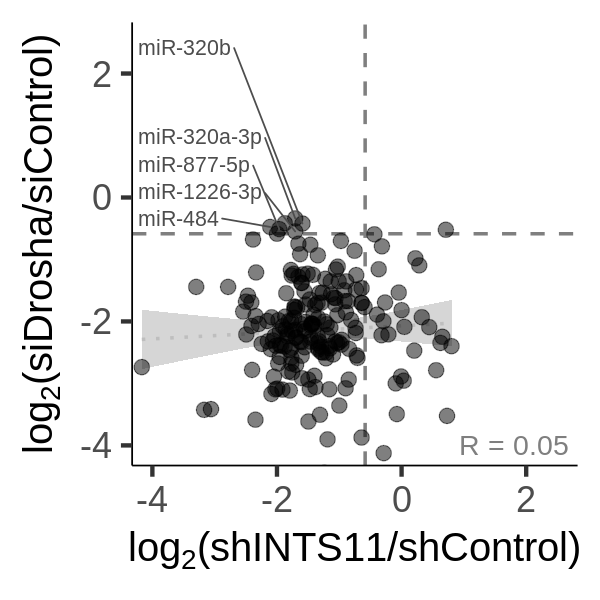

In [168]:
# INTS11 vs siDrosha

options(repr.plot.width=5, repr.plot.height=5)

xaxis=grep("shINTS11$", colnames(df.cor))
yaxis=grep("siDrosha", colnames(df.cor))

for (i in xaxis){
    for(j in yaxis) {
        sp <- round(cor(df.cor[,i], df.cor[,j], method="spearman", use="complete.obs"), digits=3)
        xlab <- colnames(df.cor[i])
        ylab <- colnames(df.cor[j])
        
        p <- ggplot(df.cor, aes(x=df.cor[,i], y=df.cor[,j])) + 
            theme_bw(base_size = 27) +
            #ggtitle("shControl") +
            theme(plot.title = element_text(hjust = '0.5')) +
            theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
                  panel.background = element_blank(), panel.border = element_blank()) +
            theme(axis.line = element_line(colour = "black", size = 0.5),
                  axis.text = element_text(angle = 0, hjust=0.5), 
                 axis.title=element_text(size=24)) +
            xlab(expression('log'[2]*'(shINTS11/shControl)')) +
            ylab(expression('log'[2]*'(siDrosha/siControl)')) +
            coord_cartesian(ylim=c(-4,2.5), xlim=c(-4,2.5))+
            geom_hline(yintercept=-log2(1.5), size=1, linetype="dashed", color="grey50") +
            geom_vline(xintercept=-log2(1.5), size=1, linetype="dashed", color="grey50") +
            geom_smooth(method="lm", formula= 'y ~ x', se=TRUE, span=1, size=1, linetype="dotted", color="grey") +
            geom_point(size=4, alpha=0.5) +
            annotate(geom="text", x=1.8, y=-4, label=paste0("R = ", sp),
              color="grey50", size=6) +
        geom_text_repel(aes(label=ifelse(indep=="yes", rownames(df.cor), '')), 
                         nudge_x=-2, nudge_y=1.2, hjust=1, direction = "y", color="grey30", size=4.5)
        #geom_text_repel(aes(label=ifelse(drosha=="yes", rownames(df.cor.mirna), '')), 
        #                 nudge_x=4, nudge_y=1.5, hjust=0, direction = "y", color="grey30", size=5)
       
        print(p)
        
        #ggsave(paste0(target.dir, "/correlation_", xlab, "_", ylab, "_205miRNA_labDroshaInd.png"), width = 12, height = 12, units= "cm", dpi=1200)
    }
}
    
